In [1]:
import urllib.request
import numpy as np
import pandas as pd

## Part 1: A little visualization exercise ##

In [2]:
def load_data_from_url(url):
    response = urllib.request.urlopen(url)
    data = response.read().decode('utf-8')
    rows = [line.split('\t') for line in data.strip().split('\n')]
    np_data = np.array(rows, dtype=float)
    return np_data

In [3]:
# Write to CSV
# url = 'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv'
# file_path = 'data_1.tsv'
# with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
#     data = response.read() 
#     out_file.write(data)  
# print(f"File downloaded and saved to {file_path}")

In [4]:
urls = [
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv',
    'https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv'
]
datasets = [load_data_from_url(url) for url in urls]
# datasets

In [5]:
data_1 = datasets[0]
data_2 = datasets[1]
data_3 = datasets[2]
data_4 = datasets[3]

In [6]:
def print_means(data, label):
    x_mean = np.mean(data[:, 0])
    y_mean = np.mean(data[:, 1])
    print(f"{label} - Mean of x-values: {x_mean:.2f}, Mean of y-values: {y_mean:.2f}")

# Calculating and printing means for each dataset
print_means(data_1, "Data 1")
print_means(data_2, "Data 2")
print_means(data_3, "Data 3")
print_means(data_4, "Data 4")

Data 1 - Mean of x-values: 9.00, Mean of y-values: 7.50
Data 2 - Mean of x-values: 9.00, Mean of y-values: 7.50
Data 3 - Mean of x-values: 9.00, Mean of y-values: 7.50
Data 4 - Mean of x-values: 9.00, Mean of y-values: 7.50


In [7]:
# ddof=1 for it calculates the sample variance rather than the population variance.
# ddof=0 for it calculates the population variance rather than the sample variance.
def print_variance(data, label):
    x_variance = np.var(data[:, 0], ddof=0)  
    y_variance = np.var(data[:, 1], ddof=0)  
    print(f"{label} - Variance of x-values: {x_variance:.3f}, Variance of y-values: {y_variance:.3f}")

print_variance(data_1, "Data 1")
print_variance(data_2, "Data 2")
print_variance(data_3, "Data 3")
print_variance(data_4, "Data 4")

Data 1 - Variance of x-values: 10.000, Variance of y-values: 3.752
Data 2 - Variance of x-values: 10.000, Variance of y-values: 3.752
Data 3 - Variance of x-values: 10.000, Variance of y-values: 3.748
Data 4 - Variance of x-values: 10.000, Variance of y-values: 3.748


In [8]:
cor = np.corrcoef(data_1[:, 0], data_1[:, 1])
cor

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [9]:
def print_pearson_correlation(data, label):
    correlation = np.corrcoef(data[:, 0], data[:, 1])[0, 1] 
    print(f"{label} - Pearson correlation coefficient between x and y: {correlation:.3f}")
# Calculating and printing Pearson correlation for each dataset
print_pearson_correlation(data_1, "Data 1")
print_pearson_correlation(data_2, "Data 2")
print_pearson_correlation(data_3, "Data 3")
print_pearson_correlation(data_4, "Data 4")

Data 1 - Pearson correlation coefficient between x and y: 0.816
Data 2 - Pearson correlation coefficient between x and y: 0.816
Data 3 - Pearson correlation coefficient between x and y: 0.816
Data 4 - Pearson correlation coefficient between x and y: 0.817


In [10]:
from scipy.stats import linregress
"""
a (slope of the fitted line),
b (intercept of the fitted line),
r_value (Pearson correlation coefficient),
p_value (two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero),
std_err (standard error of the gradient),
"""
def fit_and_print_line(data, label):
    slope, intercept, r_value, p_value, std_err = linregress(data[:, 0], data[:, 1])
    print(f"{label} - Line equation: f(x) = {slope:.2f}x + {intercept:.2f}")
fit_and_print_line(data_1, "Data 1")
fit_and_print_line(data_2, "Data 2")
fit_and_print_line(data_3, "Data 3")
fit_and_print_line(data_4, "Data 4")


Data 1 - Line equation: f(x) = 0.50x + 3.00
Data 2 - Line equation: f(x) = 0.50x + 3.00
Data 3 - Line equation: f(x) = 0.50x + 3.00
Data 4 - Line equation: f(x) = 0.50x + 3.00


In [11]:
import matplotlib.pyplot as plt

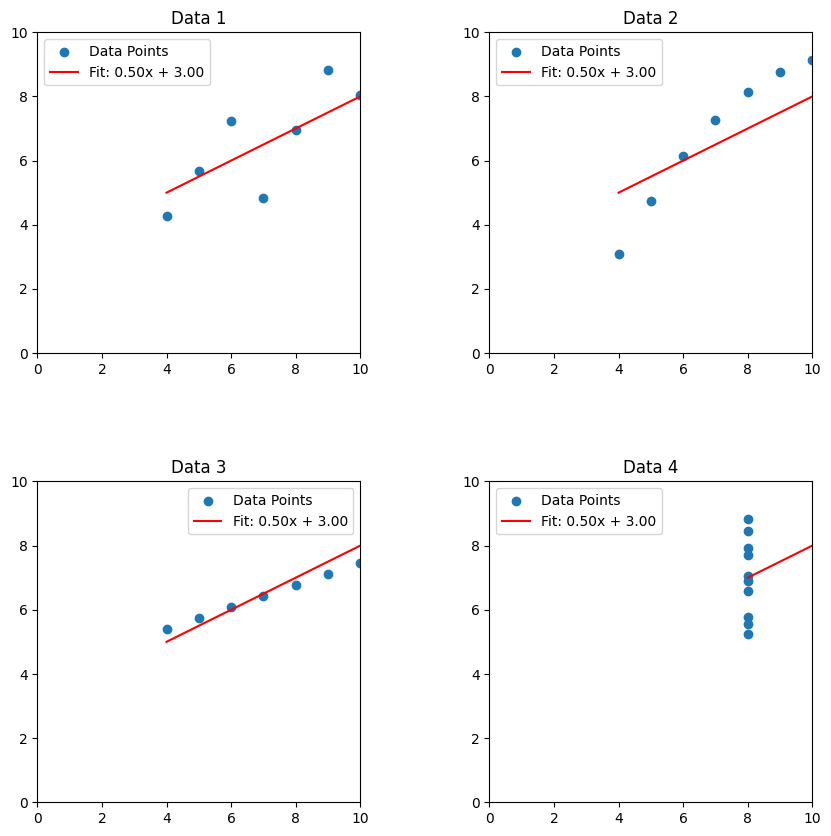

In [12]:
datasets = {
    "Data 1": data_1,
    "Data 2": data_2,
    "Data 3": data_3,
    "Data 4": data_4
}
# Setup for a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for ax, (label, data) in zip(axs.flatten(), datasets.items()):
    slope, intercept, r_value, p_value, std_err = linregress(data[:, 0], data[:, 1])
    ax.scatter(data[:, 0], data[:, 1], label='Data Points')
    x_values = np.array([min(data[:, 0]), max(data[:, 0])])
    y_values = intercept + slope * x_values
    ax.plot(x_values, y_values, 'r-', label=f'Fit: {slope:.2f}x + {intercept:.2f}')
    ax.set(title=label, xlim=(0, 10), ylim=(0, 10))
    ax.legend()
plt.show()

## Part 2: Visualizing patterns in the data ##

In [13]:
df = pd.read_csv('data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240127.csv')
df.head(5)

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek        Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday  11/22/2004  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday  10/18/2005  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday  02/15/2004  02:00   SOUTHERN       NONE   
3                  ARSON    Friday  02/18/2011  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday  11/21/2010  17:00   SOUTHERN       NONE   

   ... Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0  ...                                NaN                      NaN   
1  ...                                NaN                      NaN   
2  ...                                NaN                      NaN   
3  ...                                NaN                      NaN   
4  ...                                NaN                      NaN   

   Fix It Zones as of 2018-02-07 2 2  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                               NaN                                     NaN   
1                               NaN                                     NaN   
2                               NaN                                     NaN   
3                               1.0                                     NaN   
4                               2.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
0                              NaN                     NaN              NaN  
1                              NaN                     NaN              NaN  
2                              NaN                     NaN              NaN  
3                              NaN                     NaN             94.0  
4                              NaN                     NaN             32.0  

[5 rows x 35 columns]

In [14]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
start_date = '2003-01-01'
end_date = '2017-12-31'
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [16]:
# df_filtered = df_filtered.set_index('Date')
# crimes_per_week = df_filtered.resample('W').size()
# crimes_per_week

In [17]:
df_focus = df_filtered[df_filtered['Category'].isin(focuscrimes)]

***Weekly Pattern***

In [18]:
weekly_crime_data = df_focus.groupby(['Category', 'DayOfWeek']).size().unstack()
weekly_crime_data

DayOfWeek                    Friday  Monday  Saturday  Sunday  Thursday  \
Category                                                                  
ASSAULT                       23903   22203     25686   25476     21661   
BURGLARY                      15172   12706     11610   10463     13155   
DISORDERLY CONDUCT             1211    1450      1370    1271      1419   
DRIVING UNDER THE INFLUENCE     856     629      1139    1102       682   
DRUG/NARCOTIC                 16009   16448     13950   13215     18052   
DRUNKENNESS                    1414    1176      1823    1878      1133   
LARCENY/THEFT                 72267   61960     72109   64108     65404   
PROSTITUTION                   2776    1123      1571    1059      3630   
ROBBERY                        7655    7608      8074    7820      7405   
STOLEN PROPERTY                1547    1612      1505    1496      1611   
TRESPASS                       2672    2731      2396    2328      2682   
VANDALISM                     17826   14837     18206   16729     14828   
VEHICLE THEFT                 19839   17062     18637   17453     17355   
WEAPON LAWS                    3070    2858      2952    2753      2882   

DayOfWeek                    Tuesday  Wednesday  
Category                                         
ASSAULT                        22001      22228  
BURGLARY                       12797      13068  
DISORDERLY CONDUCT              1541       1576  
DRIVING UNDER THE INFLUENCE      580        572  
DRUG/NARCOTIC                  18574      20104  
DRUNKENNESS                     1087       1165  
LARCENY/THEFT                  63597      64920  
PROSTITUTION                    3003       3291  
ROBBERY                         7407       7448  
STOLEN PROPERTY                 1699       1723  
TRESPASS                        2906       2966  
VANDALISM                      14588      14919  
VEHICLE THEFT                  16921      17492  
WEAPON LAWS                     2837       3045

In [19]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_crime_data = weekly_crime_data[sorter]
weekly_crime_data

DayOfWeek                    Monday  Tuesday  Wednesday  Thursday  Friday  \
Category                                                                    
ASSAULT                       22203    22001      22228     21661   23903   
BURGLARY                      12706    12797      13068     13155   15172   
DISORDERLY CONDUCT             1450     1541       1576      1419    1211   
DRIVING UNDER THE INFLUENCE     629      580        572       682     856   
DRUG/NARCOTIC                 16448    18574      20104     18052   16009   
DRUNKENNESS                    1176     1087       1165      1133    1414   
LARCENY/THEFT                 61960    63597      64920     65404   72267   
PROSTITUTION                   1123     3003       3291      3630    2776   
ROBBERY                        7608     7407       7448      7405    7655   
STOLEN PROPERTY                1612     1699       1723      1611    1547   
TRESPASS                       2731     2906       2966      2682    2672   
VANDALISM                     14837    14588      14919     14828   17826   
VEHICLE THEFT                 17062    16921      17492     17355   19839   
WEAPON LAWS                    2858     2837       3045      2882    3070   

DayOfWeek                    Saturday  Sunday  
Category                                       
ASSAULT                         25686   25476  
BURGLARY                        11610   10463  
DISORDERLY CONDUCT               1370    1271  
DRIVING UNDER THE INFLUENCE      1139    1102  
DRUG/NARCOTIC                   13950   13215  
DRUNKENNESS                      1823    1878  
LARCENY/THEFT                   72109   64108  
PROSTITUTION                     1571    1059  
ROBBERY                          8074    7820  
STOLEN PROPERTY                  1505    1496  
TRESPASS                         2396    2328  
VANDALISM                       18206   16729  
VEHICLE THEFT                   18637   17453  
WEAPON LAWS                      2952    2753

In [20]:
num_categories = len(focuscrimes)
num_categories

14

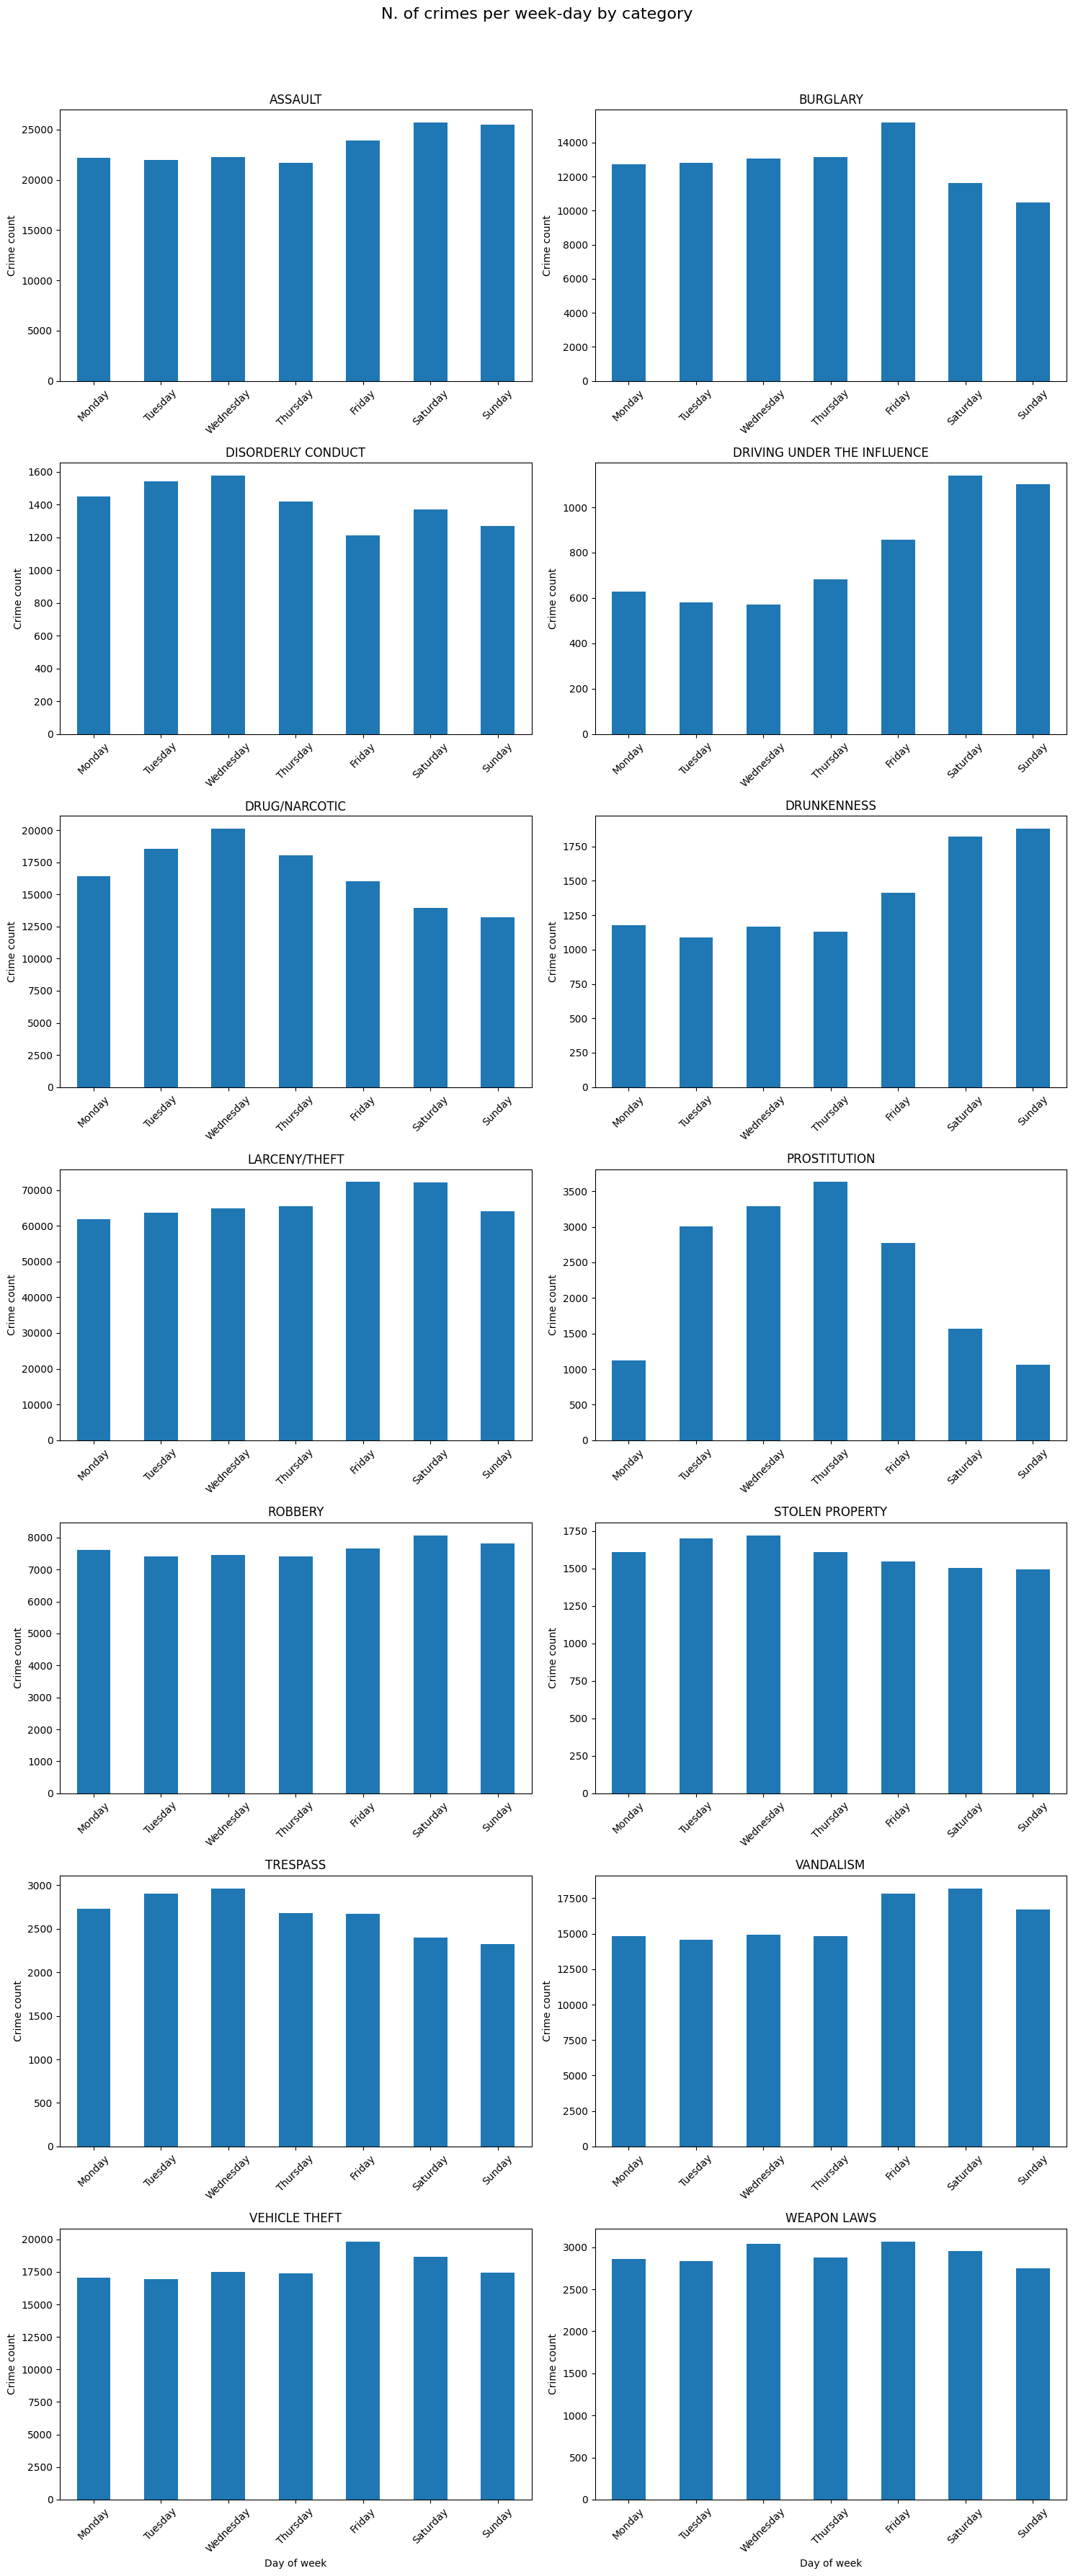

In [21]:
# Plotting
cols = 2 
rows = num_categories // cols + (num_categories % cols > 0)
plt.figure(figsize=(15, 5 * rows))
plt.suptitle('N. of crimes per week-day by category', fontsize=16, y=1.02)
for i, (category, data) in enumerate(weekly_crime_data.iterrows(), 1):
    ax = plt.subplot(rows, cols, i)
    data.plot(kind='bar', ax=ax, title=category)
    if i > (rows - 1) * cols:
        plt.xlabel('Day of week')
    else:
        ax.set_xlabel('') 
    plt.ylabel('Crime count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Monthly Pattern**

In [22]:
df_focus['Month'] = df_focus['Date'].dt.month

/tmp/ipykernel_6940/3654790435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['Month'] = df_focus['Date'].dt.month


In [23]:
monthly_crime_data = df_focus.groupby(['Category', 'Month']).size().unstack()
monthly_crime_data

Month                           1      2      3      4      5      6      7   \
Category                                                                       
ASSAULT                      13487  12542  14121  13577  13906  13499  13560   
BURGLARY                      7561   6685   7697   7462   7602   7060   7604   
DISORDERLY CONDUCT             871    784    877    798    885    753    791   
DRIVING UNDER THE INFLUENCE    453    483    503    422    508    383    428   
DRUG/NARCOTIC                10937  10356  10831   9665   9789   8636   8994   
DRUNKENNESS                    827    743    838    783    859    775    785   
LARCENY/THEFT                37800  34067  37853  37146  38402  38023  40762   
PROSTITUTION                  1622   1419   1301   1490   1359   1201   1246   
ROBBERY                       4508   3880   4188   4430   4521   4568   4570   
STOLEN PROPERTY               1002    847    962    916    951    881    958   
TRESPASS                      1671   1359   1633   1574   1686   1513   1566   
VANDALISM                     9167   8258   9611   9384   9385   9244   9980   
VEHICLE THEFT                10185   9328  10365  10471  10327  10057  10403   
WEAPON LAWS                   1695   1622   1808   1673   1669   1632   1699   

Month                           8      9      10     11     12  
Category                                                        
ASSAULT                      13933  14407  14581  13009  12536  
BURGLARY                      7513   7174   7423   7441   7749  
DISORDERLY CONDUCT             847    863    841    844    684  
DRIVING UNDER THE INFLUENCE    471    487    479    479    464  
DRUG/NARCOTIC                10099   9684   9973   9195   8193  
DRUNKENNESS                    854    809    908    739    756  
LARCENY/THEFT                41501  40136  41581  38424  38670  
PROSTITUTION                  1299   1528   1353   1366   1269  
ROBBERY                       4834   4410   4817   4354   4337  
STOLEN PROPERTY               1011    962    987    850    866  
TRESPASS                      1587   1592   1572   1466   1462  
VANDALISM                     9629   9385  10000   8893   8997  
VEHICLE THEFT                10923  10608  11412  10446  10234  
WEAPON LAWS                   1753   1700   1839   1667   1640

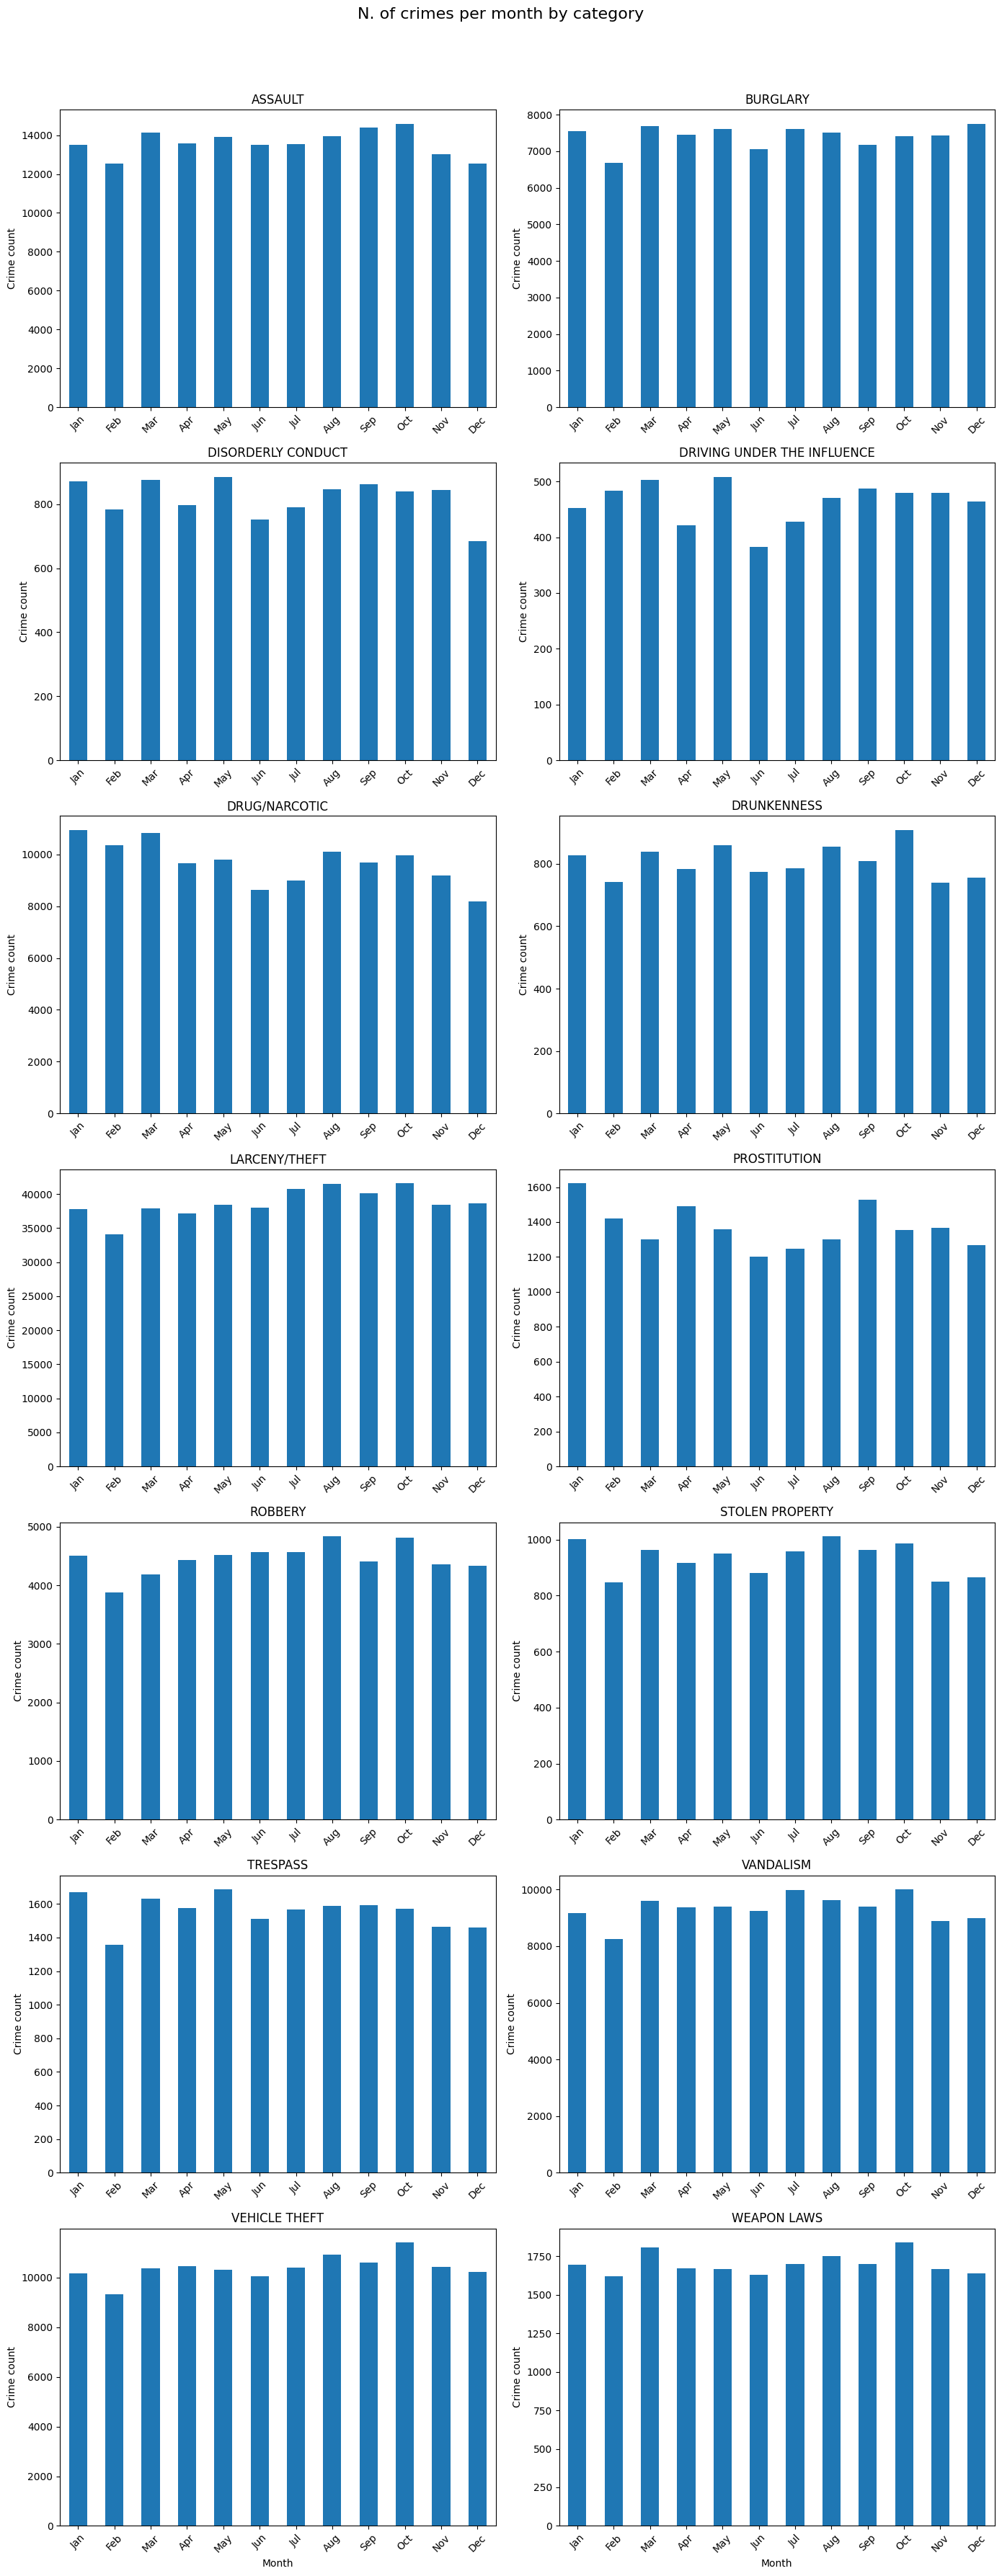

In [24]:
# Plotting
num_categories = len(monthly_crime_data)
cols = 2 
rows = num_categories // cols + (num_categories % cols > 0)
plt.figure(figsize=(14, 5 * rows))
plt.suptitle('N. of crimes per month by category', fontsize=16, y=1.02)
for i, (category, data) in enumerate(monthly_crime_data.iterrows(), 1):
    ax = plt.subplot(rows, cols, i)
    data.plot(kind='bar', ax=ax, title=category)
    if i > (rows - 1) * cols:
        ax.set_xlabel('Month')
    else:
        ax.set_xlabel('') 
    ax.set_ylabel('Crime count')
    # Optional: Set custom x-axis labels to month names or abbreviations
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

***24 hour cycle***

In [25]:
# df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Hour'] = df['Time'].apply(lambda x: x.hour)

In [26]:
df.head(5)

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek       Date      Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday 2004-11-22  17:50:00  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday 2005-10-18  20:00:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday 2004-02-15  02:00:00   SOUTHERN       NONE   
3                  ARSON    Friday 2011-02-18  05:27:00  INGLESIDE       NONE   
4                BATTERY    Sunday 2010-11-21  17:00:00   SOUTHERN       NONE   

   ... DELETE - HSOC Zones 2 2  Fix It Zones as of 2018-02-07 2 2  \
0  ...                     NaN                                NaN   
1  ...                     NaN                                NaN   
2  ...                     NaN                                NaN   
3  ...                     NaN                                NaN   
4  ...                     NaN                                NaN   

   CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                              NaN                                     NaN   
1                              NaN                                     NaN   
2                              NaN                                     NaN   
3                              1.0                                     NaN   
4                              2.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  \
0                              NaN                     NaN              NaN   
1                              NaN                     NaN              NaN   
2                              NaN                     NaN              NaN   
3                              NaN                     NaN             94.0   
4                              NaN                     NaN             32.0   

   Hour  
0    17  
1    20  
2     2  
3     5  
4    17  

[5 rows x 36 columns]

In [27]:
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY',
    'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS',
    'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
    'DISORDERLY CONDUCT'
])
df_focus = df[df['Category'].isin(focuscrimes)]

In [28]:
hourly_crime_data = df_focus.groupby(['Category', 'Hour']).size().unstack(fill_value=0)
hourly_crime_data

Hour                            0      1     2     3     4     5     6     7   \
Category                                                                        
ASSAULT                       9048   8233  7387  3627  2284  1817  2454  3616   
BURGLARY                      3482   2258  2436  2515  2229  2036  2038  3149   
DISORDERLY CONDUCT             519    382   343   216   160   397  1007   913   
DRIVING UNDER THE INFLUENCE    711    649   652   289   107    62    70    47   
DRUG/NARCOTIC                 3719   2274  1843  1249   910   474  1328  3026   
DRUNKENNESS                    826    779   663   258   132    45    81   164   
LARCENY/THEFT                19100  11781  7671  4819  3136  3152  4956  7792   
PROSTITUTION                  1350   1048   777   543   465   574   516   268   
ROBBERY                       2942   3036  3171  1911  1237  1069  1037   922   
STOLEN PROPERTY                547    386   323   253   225   177   197   279   
TRESPASS                       569    396   451   369   275   532  1170  1271   
VANDALISM                     6475   4533  4281  2884  1923  1604  1853  2501   
VEHICLE THEFT                 4750   3246  2569  1597  1233  1234  1830  3133   
WEAPON LAWS                   1123    839   745   465   313   183   251   428   

Hour                            8      9   ...     14     15     16     17  \
Category                                   ...                               
ASSAULT                       5546   6207  ...   8105   9030   8943   8991   
BURGLARY                      4876   4274  ...   3619   4233   4721   6320   
DISORDERLY CONDUCT             682    514  ...    349    331    306    291   
DRIVING UNDER THE INFLUENCE     46     58  ...     78    105    147    183   
DRUG/NARCOTIC                 3990   4666  ...   8846   8203   8590   8799   
DRUNKENNESS                    153    174  ...    327    361    435    508   
LARCENY/THEFT                13217  15682  ...  25250  26793  28046  31992   
PROSTITUTION                   151    155  ...    305    238    288    599   
ROBBERY                       1034   1237  ...   2129   2385   2629   2613   
STOLEN PROPERTY                360    381  ...    660    687    724    728   
TRESPASS                      1194   1061  ...    861    943    900    926   
VANDALISM                     3631   3410  ...   3981   4699   5220   6967   
VEHICLE THEFT                 4493   4398  ...   4554   5366   6378   8437   
WEAPON LAWS                    550    688  ...   1015   1129   1229   1206   

Hour                            18     19     20     21     22     23  
Category                                                               
ASSAULT                       8849   8573   8325   8649   8251   7905  
BURGLARY                      6380   4798   4200   4053   3854   3566  
DISORDERLY CONDUCT             325    268    249    284    386    411  
DRIVING UNDER THE INFLUENCE    193    238    285    379    512    640  
DRUG/NARCOTIC                 7825   6659   5063   4754   5704   4850  
DRUNKENNESS                    572    548    569    620    748    740  
LARCENY/THEFT                38362  36012  31430  26489  25806  23412  
PROSTITUTION                  1162   1355   1075   1274   1569   1575  
ROBBERY                       2782   2977   3356   3798   3765   3505  
STOLEN PROPERTY                707    589    544    495    507    475  
TRESPASS                       858    779    748    717    613    538  
VANDALISM                     8317   7549   7495   7641   7780   7061  
VEHICLE THEFT                10301   9010   9458   9091   9593   8375  
WEAPON LAWS                   1289   1241   1127   1149   1268   1170  

[14 rows x 24 columns]

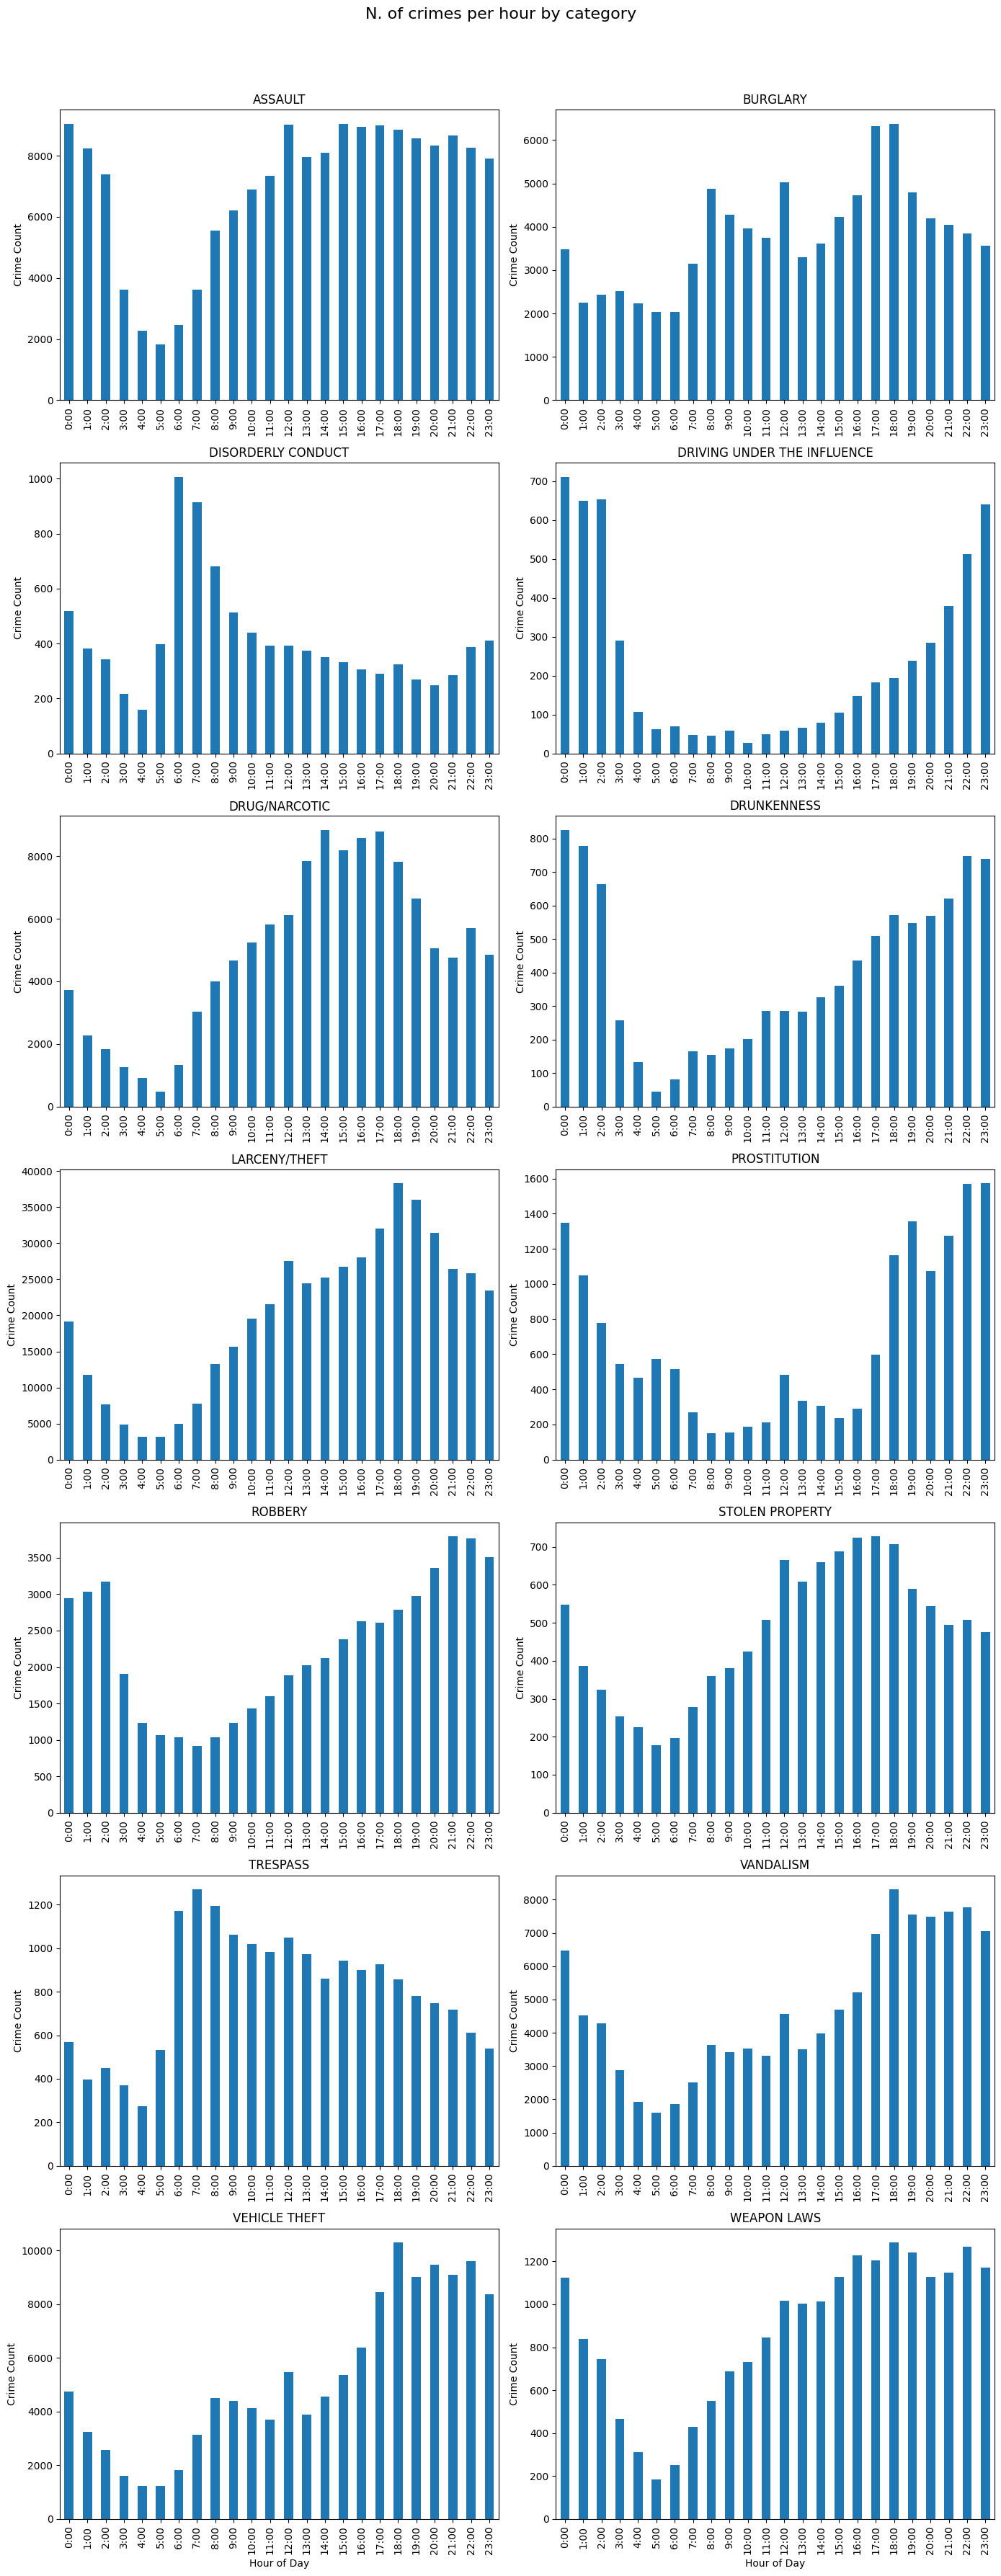

In [29]:
# Plotting
num_categories = len(hourly_crime_data)
cols = 2 
rows = num_categories // cols + (num_categories % cols > 0)
plt.figure(figsize=(14, 5 * rows))
plt.suptitle('N. of crimes per hour by category', fontsize=16, y=1.02)
for i, (category, data) in enumerate(hourly_crime_data.iterrows(), 1):
    ax = plt.subplot(rows, cols, i)
    data.plot(kind='bar', ax=ax, title=category)
    if i > (rows - 1) * cols:
         ax.set_xlabel('Hour of Day')
    else:
        ax.set_xlabel('') 
    ax.set_ylabel('Crime Count')
    ax.set_xticks(range(0, 24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)], rotation=90)

plt.tight_layout()
plt.show()

**Hours of the week**

In [30]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [31]:
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}
df['NumericDayOfWeek'] = df['DayOfWeek'].map(day_mapping)

In [32]:
df['HourOfWeek'] = df['NumericDayOfWeek'] * 24 + df['Hour']

In [33]:
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY',
    'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS',
    'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
    'DISORDERLY CONDUCT'
])
df_focus = df[df['Category'].isin(focuscrimes)]

In [34]:
weekly_hourly_crime_data = df_focus.groupby(['Category', 'HourOfWeek']).size().unstack(fill_value=0)
weekly_hourly_crime_data

HourOfWeek                    0     1     2     3    4    5    6    7     8    \
Category                                                                        
ASSAULT                      1842  2217  2039   902  473  296  342  412   580   
BURGLARY                      512   351   343   386  304  321  230  228   364   
DISORDERLY CONDUCT             98    84    67    44   22   28   89   91    88   
DRIVING UNDER THE INFLUENCE   138   150   143    75   26   21   19   10     9   
DRUG/NARCOTIC                 442   290   218   136  140   73  193  358   505   
DRUNKENNESS                   214   230   188    58   34    9   17   30    16   
LARCENY/THEFT                3982  2990  1861  1032  521  418  619  758  1300   
PROSTITUTION                  201   161   107    73   34   18   42   31    22   
ROBBERY                       520   624   690   451  257  199  179  138   117   
STOLEN PROPERTY                89    64    48    28   34   31   34   46    44   
TRESPASS                       94    65    81    61   33   43  104  137   148   
VANDALISM                    1208   962   934   608  339  270  250  264   375   
VEHICLE THEFT                 962   608   541   337  230  155  192  272   375   
WEAPON LAWS                   223   170   145    97   69   22   31   39    59   

HourOfWeek                    9    ...   158   159   160   161   162   163  \
Category                           ...                                       
ASSAULT                       710  ...  1167  1146  1193  1242  1316  1229   
BURGLARY                      343  ...   565   661   675   769   770   609   
DISORDERLY CONDUCT             51  ...    52    54    48    46    48    31   
DRIVING UNDER THE INFLUENCE    12  ...    16    11    28    32    36    51   
DRUG/NARCOTIC                 565  ...   878   869  1021  1075   954   791   
DRUNKENNESS                    23  ...    40    60    69    88   103   104   
LARCENY/THEFT                1789  ...  4010  4238  4257  4459  4949  4665   
PROSTITUTION                   18  ...    12    10    12     4    21    45   
ROBBERY                       142  ...   254   267   295   341   423   391   
STOLEN PROPERTY                57  ...   104    78    86    88    87    66   
TRESPASS                      106  ...   104   146   138   121   114    89   
VANDALISM                     415  ...   678   763   842  1033  1160  1092   
VEHICLE THEFT                 489  ...   758   872   958  1125  1269  1151   
WEAPON LAWS                    70  ...   120   130   129   164   186   140   

HourOfWeek                    164   165   166   167  
Category                                             
ASSAULT                      1289  1386  1423  1504  
BURGLARY                      561   578   547   571  
DISORDERLY CONDUCT             27    45    77    77  
DRIVING UNDER THE INFLUENCE    68    90   100   137  
DRUG/NARCOTIC                 581   529   729   637  
DRUNKENNESS                   101   100   134   154  
LARCENY/THEFT                4487  4163  4805  5337  
PROSTITUTION                   52    89   182   236  
ROBBERY                       440   554   519   568  
STOLEN PROPERTY                73    63    76    75  
TRESPASS                      104   104    85    85  
VANDALISM                    1187  1256  1406  1386  
VEHICLE THEFT                1315  1362  1565  1579  
WEAPON LAWS                   162   152   189   230  

[14 rows x 168 columns]

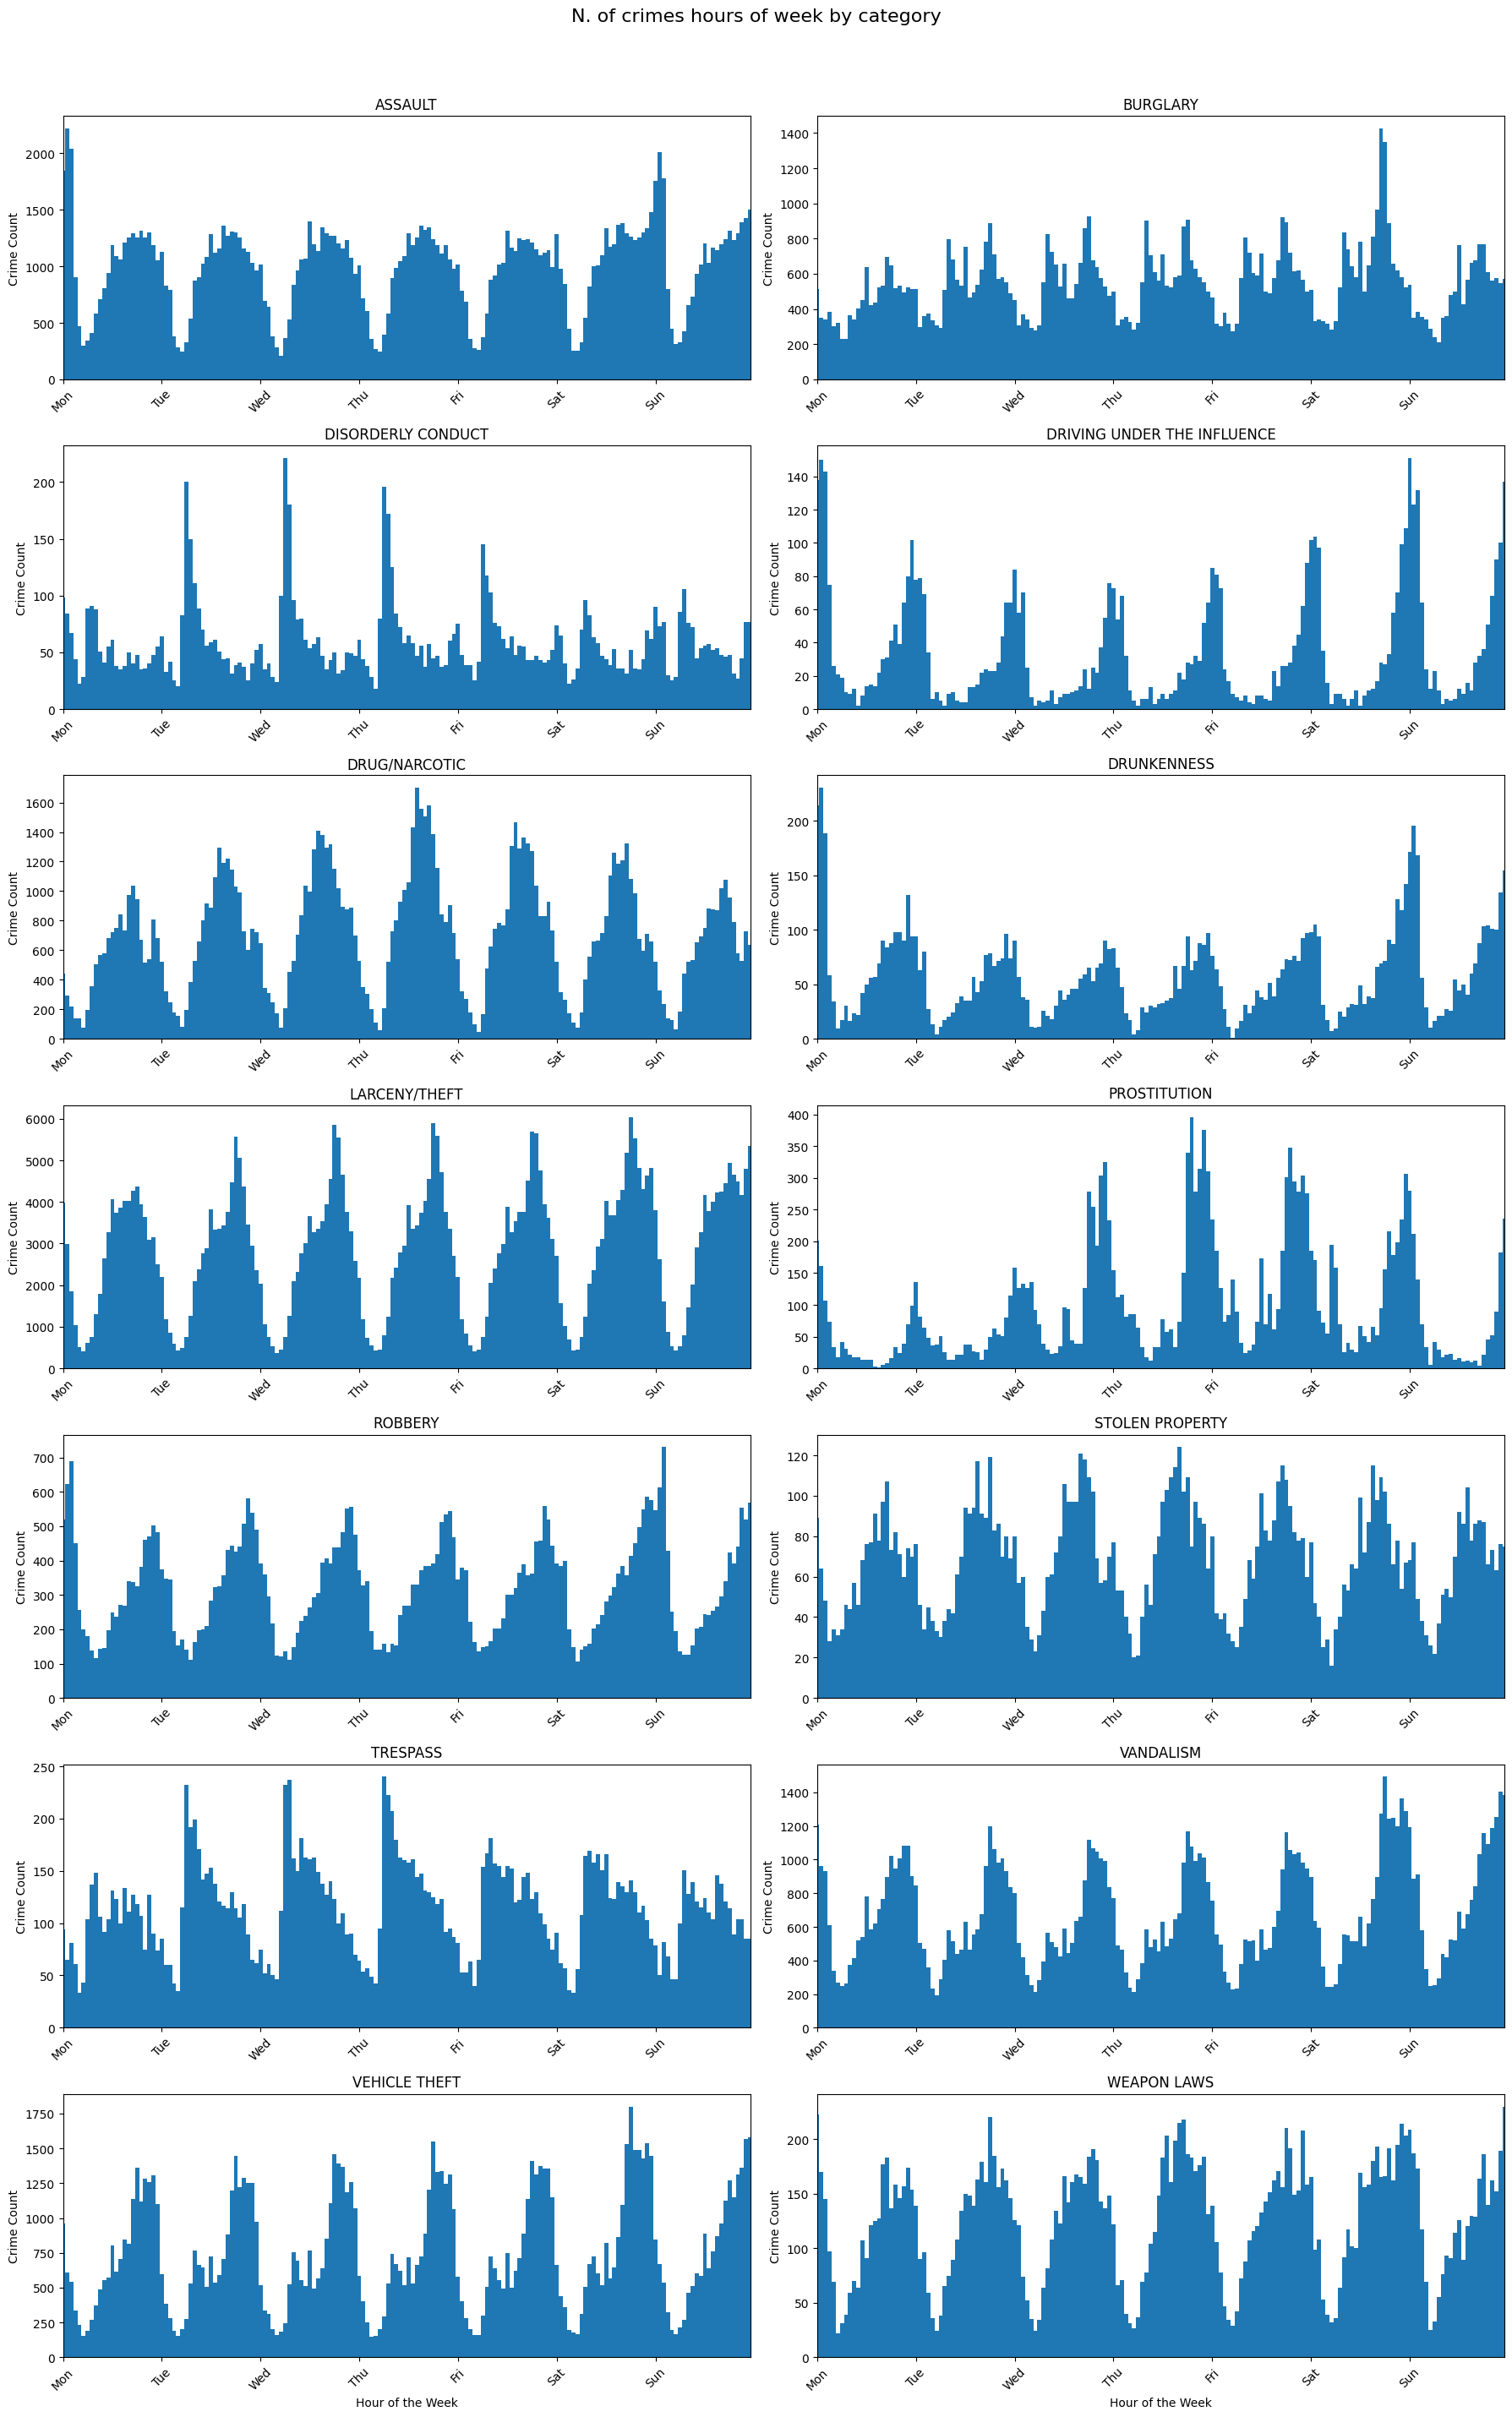

In [35]:
# Plotting
num_categories = len(weekly_hourly_crime_data)
cols = 2 
rows = num_categories // cols + (num_categories % cols > 0)

plt.figure(figsize=(18, 4 * rows))
plt.suptitle('N. of crimes hours of week by category', fontsize=16, y=1.02)
for i, (category, data) in enumerate(weekly_hourly_crime_data.iterrows(), 1):
    ax = plt.subplot(rows, cols, i)
    data.plot(kind='bar', ax=ax, title=category, width=1)
    if i > (rows - 1) * cols:
         ax.set_xlabel('Hour of the Week')
    else:
        ax.set_xlabel('') 
    ax.set_ylabel('Crime Count')
    ax.set_xticks(np.arange(0, 168, 24))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    ax.set_xlim([0, 167])

plt.tight_layout()
plt.show()

## Part 4: Exploring other types of plots for temporal data ##

***Calendar plots***

In [36]:
import calplot

In [37]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
daily_counts = df.groupby(['Year', 'Month', 'Day']).size()
print(daily_counts.index)

MultiIndex([(2003, 1,  1),
            (2003, 1,  2),
            (2003, 1,  3),
            (2003, 1,  4),
            (2003, 1,  5),
            (2003, 1,  6),
            (2003, 1,  7),
            (2003, 1,  8),
            (2003, 1,  9),
            (2003, 1, 10),
            ...
            (2018, 5,  6),
            (2018, 5,  7),
            (2018, 5,  8),
            (2018, 5,  9),
            (2018, 5, 10),
            (2018, 5, 11),
            (2018, 5, 12),
            (2018, 5, 13),
            (2018, 5, 14),
            (2018, 5, 15)],
           names=['Year', 'Month', 'Day'], length=5613)


In [38]:
daily_counts.index = pd.to_datetime([f'{year}-{month:02}-{day:02}' for year, month, day in daily_counts.index])
daily_counts

2003-01-01    582
2003-01-02    384
2003-01-03    418
2003-01-04    328
2003-01-05    367
             ... 
2018-05-11    209
2018-05-12    186
2018-05-13    143
2018-05-14     78
2018-05-15     10
Length: 5613, dtype: int64

In [39]:
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

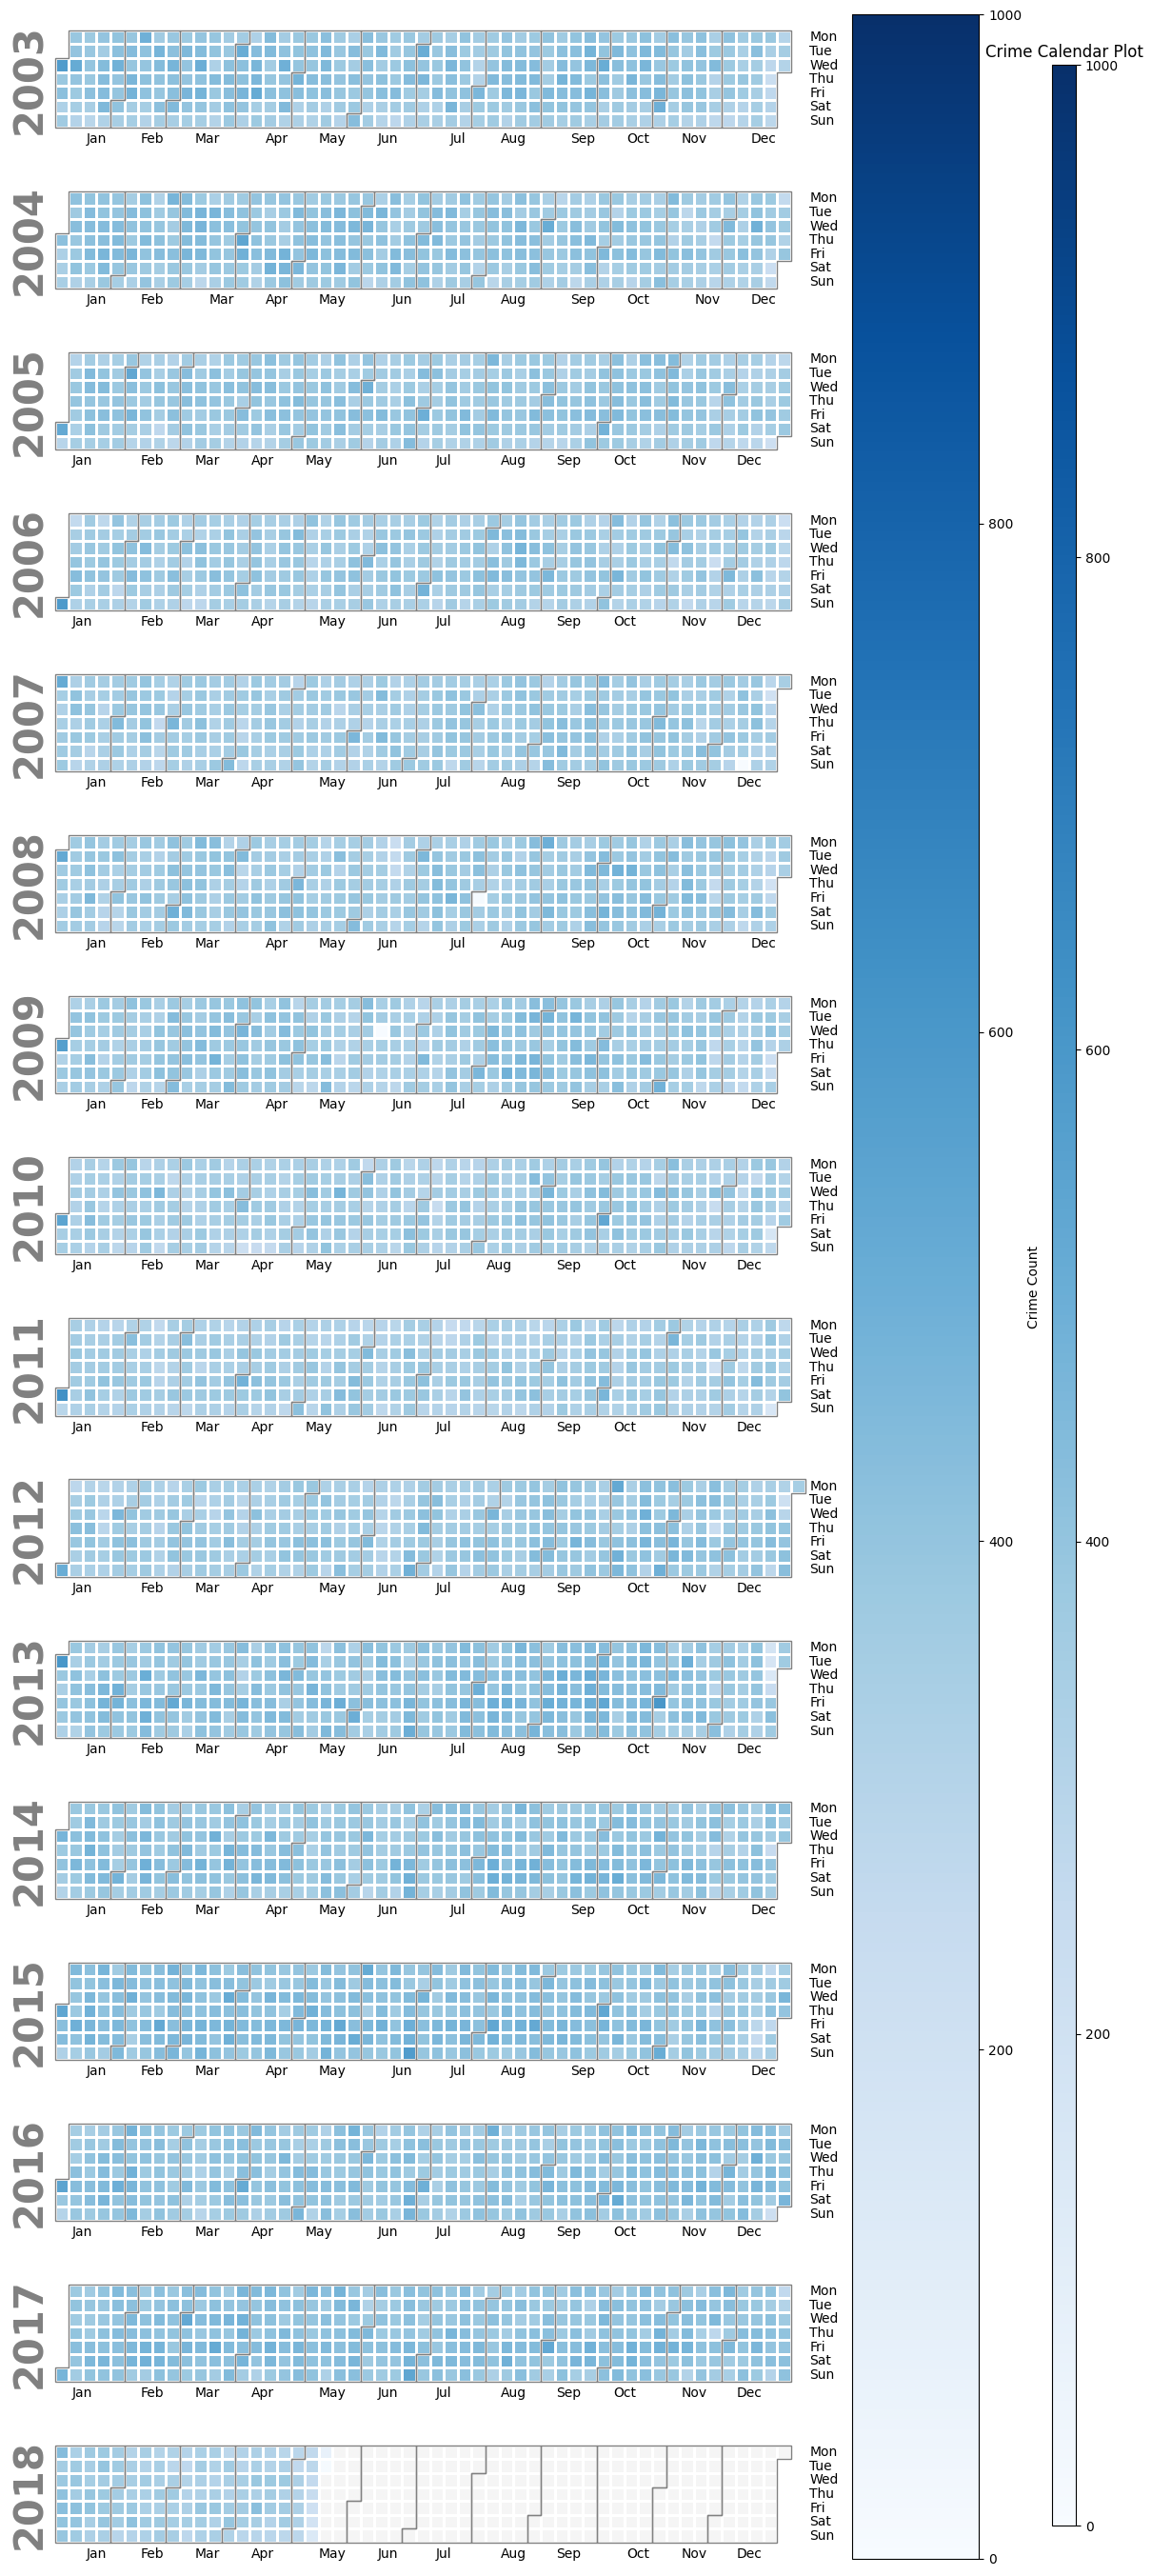

In [40]:
# Plot calendar plot
fig, ax = calplot.calplot(daily_counts, cmap='Blues', edgecolor='gray', vmax=1000)
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), label='Crime Count')
plt.title('Crime Calendar Plot')
# plt.savefig('data/Crime Count.jpg')
plt.show()

In [41]:
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}
df['NumericDayOfWeek'] = df['DayOfWeek'].map(day_mapping)
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['HourOfWeek'] = df['NumericDayOfWeek'] * 24 + df['Hour']

In [42]:
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY',
    'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS',
    'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
    'DISORDERLY CONDUCT'
])
df_focus = df[df['Category'].isin(focuscrimes)]

In [43]:
hourly_crime_data = df_focus.groupby('Hour').size()
hourly_crime_data

Hour
0     55161
1     39840
2     33312
3     20995
4     14629
5     13356
6     18788
7     27509
8     39923
9     42905
10    47777
11    50308
12    63594
13    56602
14    60079
15    64503
16    68556
17    78560
18    87922
19    80596
20    73924
21    69393
22    70356
23    64223
dtype: int64

In [44]:
weekly_hourly_crime_data = df_focus.groupby('HourOfWeek').size()
weekly_hourly_crime_data

HourOfWeek
0      10525
1       8966
2       7405
3       4288
4       2516
       ...  
163    10454
164    10447
165    10471
166    11837
167    12576
Length: 168, dtype: int64

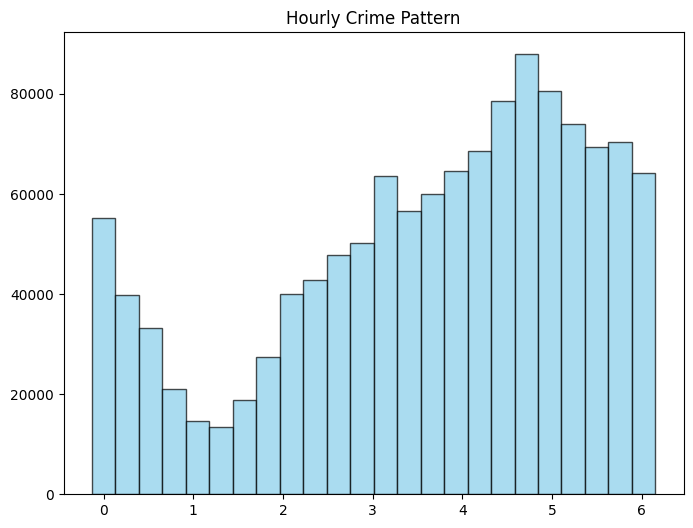

In [45]:
# Plotting the 24-hour pattern
plt.figure(figsize=(8, 6))
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)  # Divide the circle into 24 parts
bars = plt.bar(theta, hourly_crime_data, width=2*np.pi/24, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Hourly Crime Pattern')
plt.show()

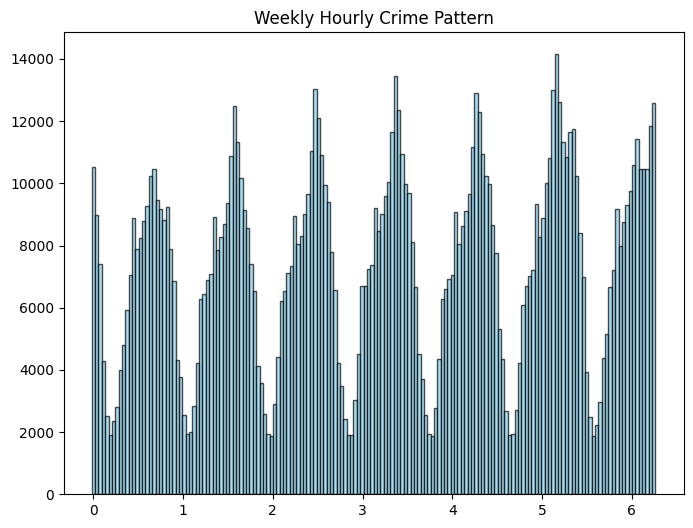

In [46]:
# Plotting the 168-hour pattern
plt.figure(figsize=(8, 6))
theta = np.linspace(0, 2*np.pi, 168, endpoint=False)  # Divide the circle into 168 parts
bars = plt.bar(theta, weekly_hourly_crime_data, width=2*np.pi/168, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Weekly Hourly Crime Pattern')
plt.show()

In [47]:
import plotly.express as px
import plotly.graph_objs as go

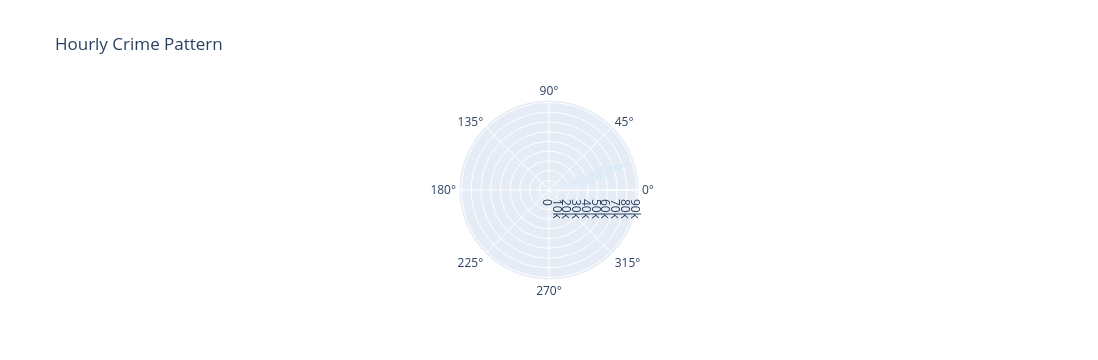

In [48]:
# Plotting the 24-hour pattern with Plotly
theta_hourly = np.linspace(0, 2 * np.pi, 24, endpoint=False)
fig_hourly = go.Figure(data=[go.Barpolar(r=list(hourly_crime_data), theta=list(hourly_crime_data.index), 
                                         width=[2*np.pi/24]*24, marker_color='skyblue')])
fig_hourly.update_layout(title='Hourly Crime Pattern')
fig_hourly.show()

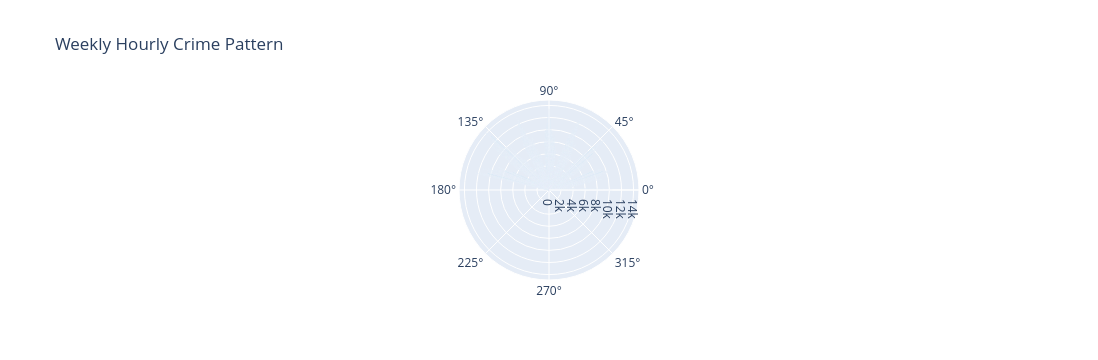

In [49]:
# Plotting the 168-hour pattern with Plotly
theta_weekly = np.linspace(0, 2 * np.pi, 168, endpoint=False)
fig_weekly = go.Figure(data=[go.Barpolar(r=list(weekly_hourly_crime_data), theta=list(weekly_hourly_crime_data.index), 
                                         width=[2*np.pi/168]*168, marker_color='skyblue')])
fig_weekly.update_layout(title='Weekly Hourly Crime Pattern')
fig_weekly.show()

### Part 5: Back to visualizing patterns in the data ###

In [50]:
# No need read again, you can use copy() function.
df5 = pd.read_csv('data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240127.csv')
df5.head(5)

PdId  IncidntNum  Incident Code       Category  \
0   4133422003074    41334220           3074        ROBBERY   
1   5118535807021    51185358           7021  VEHICLE THEFT   
2   4018830907021    40188309           7021  VEHICLE THEFT   
3  11014543126030   110145431          26030          ARSON   
4  10108108004134   101081080           4134        ASSAULT   

                Descript DayOfWeek        Date   Time PdDistrict Resolution  \
0  ROBBERY, BODILY FORCE    Monday  11/22/2004  17:50  INGLESIDE       NONE   
1      STOLEN AUTOMOBILE   Tuesday  10/18/2005  20:00       PARK       NONE   
2      STOLEN AUTOMOBILE    Sunday  02/15/2004  02:00   SOUTHERN       NONE   
3                  ARSON    Friday  02/18/2011  05:27  INGLESIDE       NONE   
4                BATTERY    Sunday  11/21/2010  17:00   SOUTHERN       NONE   

   ... Fix It Zones as of 2017-11-06  2 2  DELETE - HSOC Zones 2 2  \
0  ...                                NaN                      NaN   
1  ...                                NaN                      NaN   
2  ...                                NaN                      NaN   
3  ...                                NaN                      NaN   
4  ...                                NaN                      NaN   

   Fix It Zones as of 2018-02-07 2 2  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

  CBD, BID and GBD Boundaries as of 2017 2 2  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Areas of Vulnerability, 2016 2 2  Central Market/Tenderloin Boundary 2 2  \
0                               NaN                                     NaN   
1                               NaN                                     NaN   
2                               NaN                                     NaN   
3                               1.0                                     NaN   
4                               2.0                                     NaN   

   Central Market/Tenderloin Boundary Polygon - Updated 2 2  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   HSOC Zones as of 2018-06-05 2 2  OWED Public Spaces 2 2  Neighborhoods 2  
0                              NaN                     NaN              NaN  
1                              NaN                     NaN              NaN  
2                              NaN                     NaN              NaN  
3                              NaN                     NaN             94.0  
4                              NaN                     NaN             32.0  

[5 rows x 35 columns]

In [51]:
to_districts = ['CENTRAL', 'SOUTHERN', 'BAYVIEW', 'MISSION','NORTHERN', 'PARK', 'RICHMOND', 'INGLESIDE', 'TARAVAL','TENDERLOIN']

In [52]:
focuscrimes = set([
    'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY',
    'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS',
    'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY',
    'DISORDERLY CONDUCT'
])

In [53]:
# Calculate the total number of crimes in each district
total_crimes_by_district = df5['PdDistrict'].value_counts()
total_crimes_by_district

PdDistrict
SOUTHERN      390692
MISSION       288985
NORTHERN      266435
CENTRAL       221923
BAYVIEW       205480
TENDERLOIN    186954
INGLESIDE     181092
TARAVAL       155461
PARK          119698
RICHMOND      112804
Name: count, dtype: int64

In [54]:
# Identify the district with the most crimes
district_most_crimes = total_crimes_by_district.idxmax()
district_most_crimes

'SOUTHERN'

In [55]:
focus_crimes_df = df5[df5['Category'].isin(focuscrimes)]

In [56]:
# Calculate the total number of focus crimes in each district
focus_crimes_by_district = focus_crimes_df['PdDistrict'].value_counts()
focus_crimes_by_district

PdDistrict
SOUTHERN      226805
NORTHERN      172194
MISSION       162971
CENTRAL       139961
BAYVIEW       112054
TENDERLOIN    104950
INGLESIDE     101328
TARAVAL        88132
PARK           67645
RICHMOND       66770
Name: count, dtype: int64

In [57]:
# Identify the district with the most focus crimes
district_most_focus_crimes = focus_crimes_by_district.idxmax()
district_most_focus_crimes

'SOUTHERN'

In [58]:
# Calculate the overall probability of each crime (P(crime))
p_crime = df5['Category'].value_counts(normalize=True)
p_crime

Category
LARCENY/THEFT                  0.224451
OTHER OFFENSES                 0.141756
NON-CRIMINAL                   0.111259
ASSAULT                        0.078441
VEHICLE THEFT                  0.059275
DRUG/NARCOTIC                  0.055327
VANDALISM                      0.053870
WARRANTS                       0.046875
BURGLARY                       0.042764
SUSPICIOUS OCC                 0.037138
ROBBERY                        0.025577
MISSING PERSON                 0.020788
FRAUD                          0.019417
FORGERY/COUNTERFEITING         0.010798
SECONDARY CODES                0.010508
WEAPON LAWS                    0.009863
TRESPASS                       0.009013
PROSTITUTION                   0.007749
STOLEN PROPERTY                0.005377
DISORDERLY CONDUCT             0.004664
DRUNKENNESS                    0.004583
SEX OFFENSES, FORCIBLE         0.004107
RECOVERED VEHICLE              0.004080
DRIVING UNDER THE INFLUENCE    0.002654
KIDNAPPING                     

In [59]:
# Calculate P(crime|district) for each PD district in the provided dataset sample
p_crime_district = df5.groupby('PdDistrict')['Category'].value_counts(normalize=True).unstack(fill_value=0)
p_crime_district

Category       ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  \
PdDistrict                                                       
BAYVIEW     0.004818  0.097411    0.000355  0.000759  0.046749   
CENTRAL     0.001239  0.071295    0.000581  0.000207  0.050292   
INGLESIDE   0.002490  0.093593    0.000436  0.000795  0.045093   
MISSION     0.001488  0.087589    0.000318  0.000505  0.033237   
NORTHERN    0.001430  0.069525    0.000522  0.000195  0.053593   
PARK        0.001295  0.061864    0.000267  0.000226  0.059074   
RICHMOND    0.001924  0.058721    0.000585  0.000213  0.057463   
SOUTHERN    0.001231  0.072863    0.000448  0.000276  0.031943   
TARAVAL     0.002123  0.069754    0.000643  0.000334  0.056323   
TENDERLOIN  0.000883  0.091354    0.000209  0.000219  0.018513   

Category    DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
PdDistrict                                                                   
BAYVIEW               0.002657                     0.002214       0.046822   
CENTRAL               0.004641                     0.001820       0.018015   
INGLESIDE             0.001966                     0.002866       0.027754   
MISSION               0.008935                     0.003142       0.065599   
NORTHERN              0.004237                     0.002237       0.039871   
PARK                  0.004979                     0.003500       0.047921   
RICHMOND              0.002003                     0.007083       0.019006   
SOUTHERN              0.003397                     0.001945       0.052975   
TARAVAL               0.002412                     0.003525       0.020706   
TENDERLOIN            0.009441                     0.001305       0.202189   

Category    DRUNKENNESS  EMBEZZLEMENT  ...  SEX OFFENSES, NON FORCIBLE  \
PdDistrict                             ...                               
BAYVIEW        0.002769      0.001426  ...                    0.000024   
CENTRAL        0.005380      0.002073  ...                    0.000014   
INGLESIDE      0.002529      0.000977  ...                    0.000028   
MISSION        0.006218      0.001093  ...                    0.000024   
NORTHERN       0.003055      0.001239  ...                    0.000019   
PARK           0.006550      0.000927  ...                    0.000042   
RICHMOND       0.003165      0.001064  ...                    0.000044   
SOUTHERN       0.005483      0.001674  ...                    0.000010   
TARAVAL        0.004252      0.001615  ...                    0.000019   
TENDERLOIN     0.005263      0.001455  ...                    0.000005   

Category    STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC      TREA  TRESPASS  \
PdDistrict                                                                  
BAYVIEW            0.004356  0.000375        0.045888  0.000019  0.007811   
CENTRAL            0.006385  0.000640        0.033548  0.000009  0.010891   
INGLESIDE          0.004545  0.000878        0.042260  0.000006  0.005390   
MISSION            0.005332  0.000595        0.035182  0.000003  0.010308   
NORTHERN           0.006756  0.000702        0.031171  0.000004  0.008118   
PARK               0.003943  0.000602        0.034403  0.000000  0.006750   
RICHMOND           0.004512  0.000762        0.047232  0.000000  0.005487   
SOUTHERN           0.006558  0.000410        0.032901  0.000005  0.009890   
TARAVAL            0.003950  0.000958        0.047079  0.000019  0.006992   
TENDERLOIN         0.004370  0.000465        0.034602  0.000000  0.014314   

Category    VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  
PdDistrict                                                   
BAYVIEW      0.067719       0.081662  0.048297     0.019851  
CENTRAL      0.056402       0.045007  0.031745     0.005660  
INGLESIDE    0.071179       0.113456  0.033005     0.014517  
MISSION      0.047954       0.059854  0.055255     0.011516  
NORTHERN     0.054115       0.055473  0.040854     0.007255  
PARK         0.054195 

In [60]:
# We need to ensure that the p_crime Series is aligned properly with the p_crime_district DataFrame
# Align the series with the DataFrame by reindexing
p_crime_aligned = p_crime.reindex(p_crime_district.columns, fill_value=0)
p_crime_aligned

Category
ARSON                          0.001820
ASSAULT                        0.078441
BAD CHECKS                     0.000434
BRIBERY                        0.000374
BURGLARY                       0.042764
DISORDERLY CONDUCT             0.004664
DRIVING UNDER THE INFLUENCE    0.002654
DRUG/NARCOTIC                  0.055327
DRUNKENNESS                    0.004583
EMBEZZLEMENT                   0.001401
EXTORTION                      0.000342
FORGERY/COUNTERFEITING         0.010798
FRAUD                          0.019417
GAMBLING                       0.000161
KIDNAPPING                     0.002011
LARCENY/THEFT                  0.224451
LIQUOR LAWS                    0.001334
LOITERING                      0.001128
MISSING PERSON                 0.020788
NON-CRIMINAL                   0.111259
OTHER OFFENSES                 0.141756
PORNOGRAPHY/OBSCENE MAT        0.000027
PROSTITUTION                   0.007749
RECOVERED VEHICLE              0.004080
ROBBERY                        

In [61]:
# Calculate the ratios
crime_ratios = p_crime_district.divide(p_crime_aligned, axis=1)
crime_ratios

Category       ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  \
PdDistrict                                                       
BAYVIEW     2.647748  1.241838    0.818774  2.031069  1.093188   
CENTRAL     0.680991  0.908900    1.339671  0.554530  1.176041   
INGLESIDE   1.368637  1.193169    1.005399  2.127320  1.054464   
MISSION     0.817719  1.116627    0.733708  1.351597  0.777220   
NORTHERN    0.785859  0.886340    1.202359  0.522134  1.253223   
PARK        0.711633  0.788670    0.616132  0.603457  1.381388   
RICHMOND    1.057174  0.748605    1.348436  0.569189  1.343712   
SOUTHERN    0.676584  0.928890    1.032320  0.739535  0.746968   
TARAVAL     1.166550  0.889253    1.482482  0.894853  1.317061   
TENDERLOIN  0.485021  1.164621    0.480774  0.586704  0.432901   

Category    DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
PdDistrict                                                                   
BAYVIEW               0.569730                     0.834300       0.846273   
CENTRAL               0.995133                     0.685898       0.325612   
INGLESIDE             0.421499                     1.079813       0.501630   
MISSION               1.915698                     1.183835       1.185644   
NORTHERN              0.908550                     0.842821       0.720636   
PARK                  1.067592                     1.318887       0.866128   
RICHMOND              0.429566                     2.668719       0.343527   
SOUTHERN              0.728253                     0.732925       0.957487   
TARAVAL               0.517197                     1.328127       0.374248   
TENDERLOIN            2.024212                     0.491740       3.654408   

Category    DRUNKENNESS  EMBEZZLEMENT  ...  SEX OFFENSES, NON FORCIBLE  \
PdDistrict                             ...                               
BAYVIEW        0.604193      1.017611  ...                    1.205077   
CENTRAL        1.173910      1.479243  ...                    0.669473   
INGLESIDE      0.551822      0.697522  ...                    1.367367   
MISSION        1.356768      0.780361  ...                    1.199602   
NORTHERN       0.666601      0.883907  ...                    0.929379   
PARK           1.429098      0.661790  ...                    2.068699   
RICHMOND       0.690521      0.759173  ...                    2.195128   
SOUTHERN       1.196239      1.194613  ...                    0.507037   
TARAVAL        0.927711      1.152222  ...                    0.955683   
TENDERLOIN     1.148400      1.038289  ...                    0.264899   

Category    STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC      TREA  TRESPASS  \
PdDistrict                                                                  
BAYVIEW            0.810085  0.618127        1.235588  2.961046  0.866608   
CENTRAL            1.187531  1.055462        0.903317  1.370826  1.208347   
INGLESIDE          0.845236  1.448286        1.137916  0.839954  0.597954   
MISSION            0.991755  0.981770        0.947317  0.526356  1.143701   
NORTHERN           1.256488  1.157729        0.839317  0.570904  0.900705   
PARK               0.733386  0.992207        0.926354  0.000000  0.748931   
RICHMOND           0.839210  1.257565        1.271796  0.000000  0.608812   
SOUTHERN           1.219612  0.675526        0.885893  0.778664  1.097286   
TARAVAL            0.734555  1.580962        1.267675  2.935314  0.775756   
TENDERLOIN         0.812764  0.767611        0.931708  0.000000  1.588066   

Category    VANDALISM  VEHICLE THEFT  WARRANTS  WEAPON LAWS  
PdDistrict                                                   
BAYVIEW      1.257086       1.377683  1.030334     2.012634  
CENTRAL      1.047006       0.759282  0.677235     0.573810  
INGLESIDE    1.321310       1.914058  0.704117     1.471879  
MISSION      0.890177       1.009770  1.178789     1.167586  
NORTHERN     1.004535       0.935859  0.871561     0.735565  
PARK         1.006024 

In [62]:
focuscrimes_list = list(focuscrimes)
ratios_df = crime_ratios[focuscrimes_list].fillna(0)
ratios_df

Category    DRUG/NARCOTIC  PROSTITUTION  LARCENY/THEFT  VANDALISM   ASSAULT  \
PdDistrict                                                                    
BAYVIEW          0.846273      0.085417       0.599259   1.257086  1.241838   
CENTRAL          0.325612      1.078152       1.441611   1.047006  0.908900   
INGLESIDE        0.501630      0.057012       0.632701   1.321310  1.193169   
MISSION          1.185644      3.263144       0.752523   0.890177  1.116627   
NORTHERN         0.720636      1.910857       1.352118   1.004535  0.886340   
PARK             0.866128      0.019407       0.943260   1.006024  0.788670   
RICHMOND         0.343527      0.073220       1.147596   1.276005  0.748605   
SOUTHERN         0.957487      0.227922       1.285326   0.822696  0.928890   
TARAVAL          0.374248      0.342848       0.909225   1.361478  0.889253   
TENDERLOIN       3.654408      1.376458       0.579213   0.413255  1.164621   

Category    DRUNKENNESS  TRESPASS  WEAPON LAWS  STOLEN PROPERTY  \
PdDistrict                                                        
BAYVIEW        0.604193  0.866608     2.012634         0.810085   
CENTRAL        1.173910  1.208347     0.573810         1.187531   
INGLESIDE      0.551822  0.597954     1.471879         0.845236   
MISSION        1.356768  1.143701     1.167586         0.991755   
NORTHERN       0.666601  0.900705     0.735565         1.256488   
PARK           1.429098  0.748931     0.727590         0.733386   
RICHMOND       0.690521  0.608812     0.621061         0.839210   
SOUTHERN       1.196239  1.097286     0.759572         1.219612   
TARAVAL        0.927711  0.775756     0.829557         0.734555   
TENDERLOIN     1.148400  1.588066     1.100885         0.812764   

Category    DISORDERLY CONDUCT   ROBBERY  DRIVING UNDER THE INFLUENCE  \
PdDistrict                                                              
BAYVIEW               0.569730  1.178368                     0.834300   
CENTRAL               0.995133  0.897617                     0.685898   
INGLESIDE             0.421499  1.337061                     1.079813   
MISSION               1.915698  1.175557                     1.183835   
NORTHERN              0.908550  0.929031                     0.842821   
PARK                  1.067592  0.704551                     1.318887   
RICHMOND              0.429566  0.637738                     2.668719   
SOUTHERN              0.728253  0.946386                     0.732925   
TARAVAL               0.517197  0.817104                     1.328127   
TENDERLOIN            2.024212  1.100647                     0.491740   

Category    BURGLARY  VEHICLE THEFT  
PdDistrict                           
BAYVIEW     1.093188       1.377683  
CENTRAL     1.176041       0.759282  
INGLESIDE   1.054464       1.914058  
MISSION     0.777220       1.009770  
NORTHERN    1.253223       0.935859  
PARK        1.381388       1.337680  
RICHMOND    1.343712       1.436481  
SOUTHERN    0.746968       0.492479  
TARAVAL     1.317061       1.515576  
TENDERLOIN  0.432901       0.213865

In [63]:
ratios_df.loc['CENTRAL']

Category
DRUG/NARCOTIC                  0.325612
PROSTITUTION                   1.078152
LARCENY/THEFT                  1.441611
VANDALISM                      1.047006
ASSAULT                        0.908900
DRUNKENNESS                    1.173910
TRESPASS                       1.208347
WEAPON LAWS                    0.573810
STOLEN PROPERTY                1.187531
DISORDERLY CONDUCT             0.995133
ROBBERY                        0.897617
DRIVING UNDER THE INFLUENCE    0.685898
BURGLARY                       1.176041
VEHICLE THEFT                  0.759282
Name: CENTRAL, dtype: float64

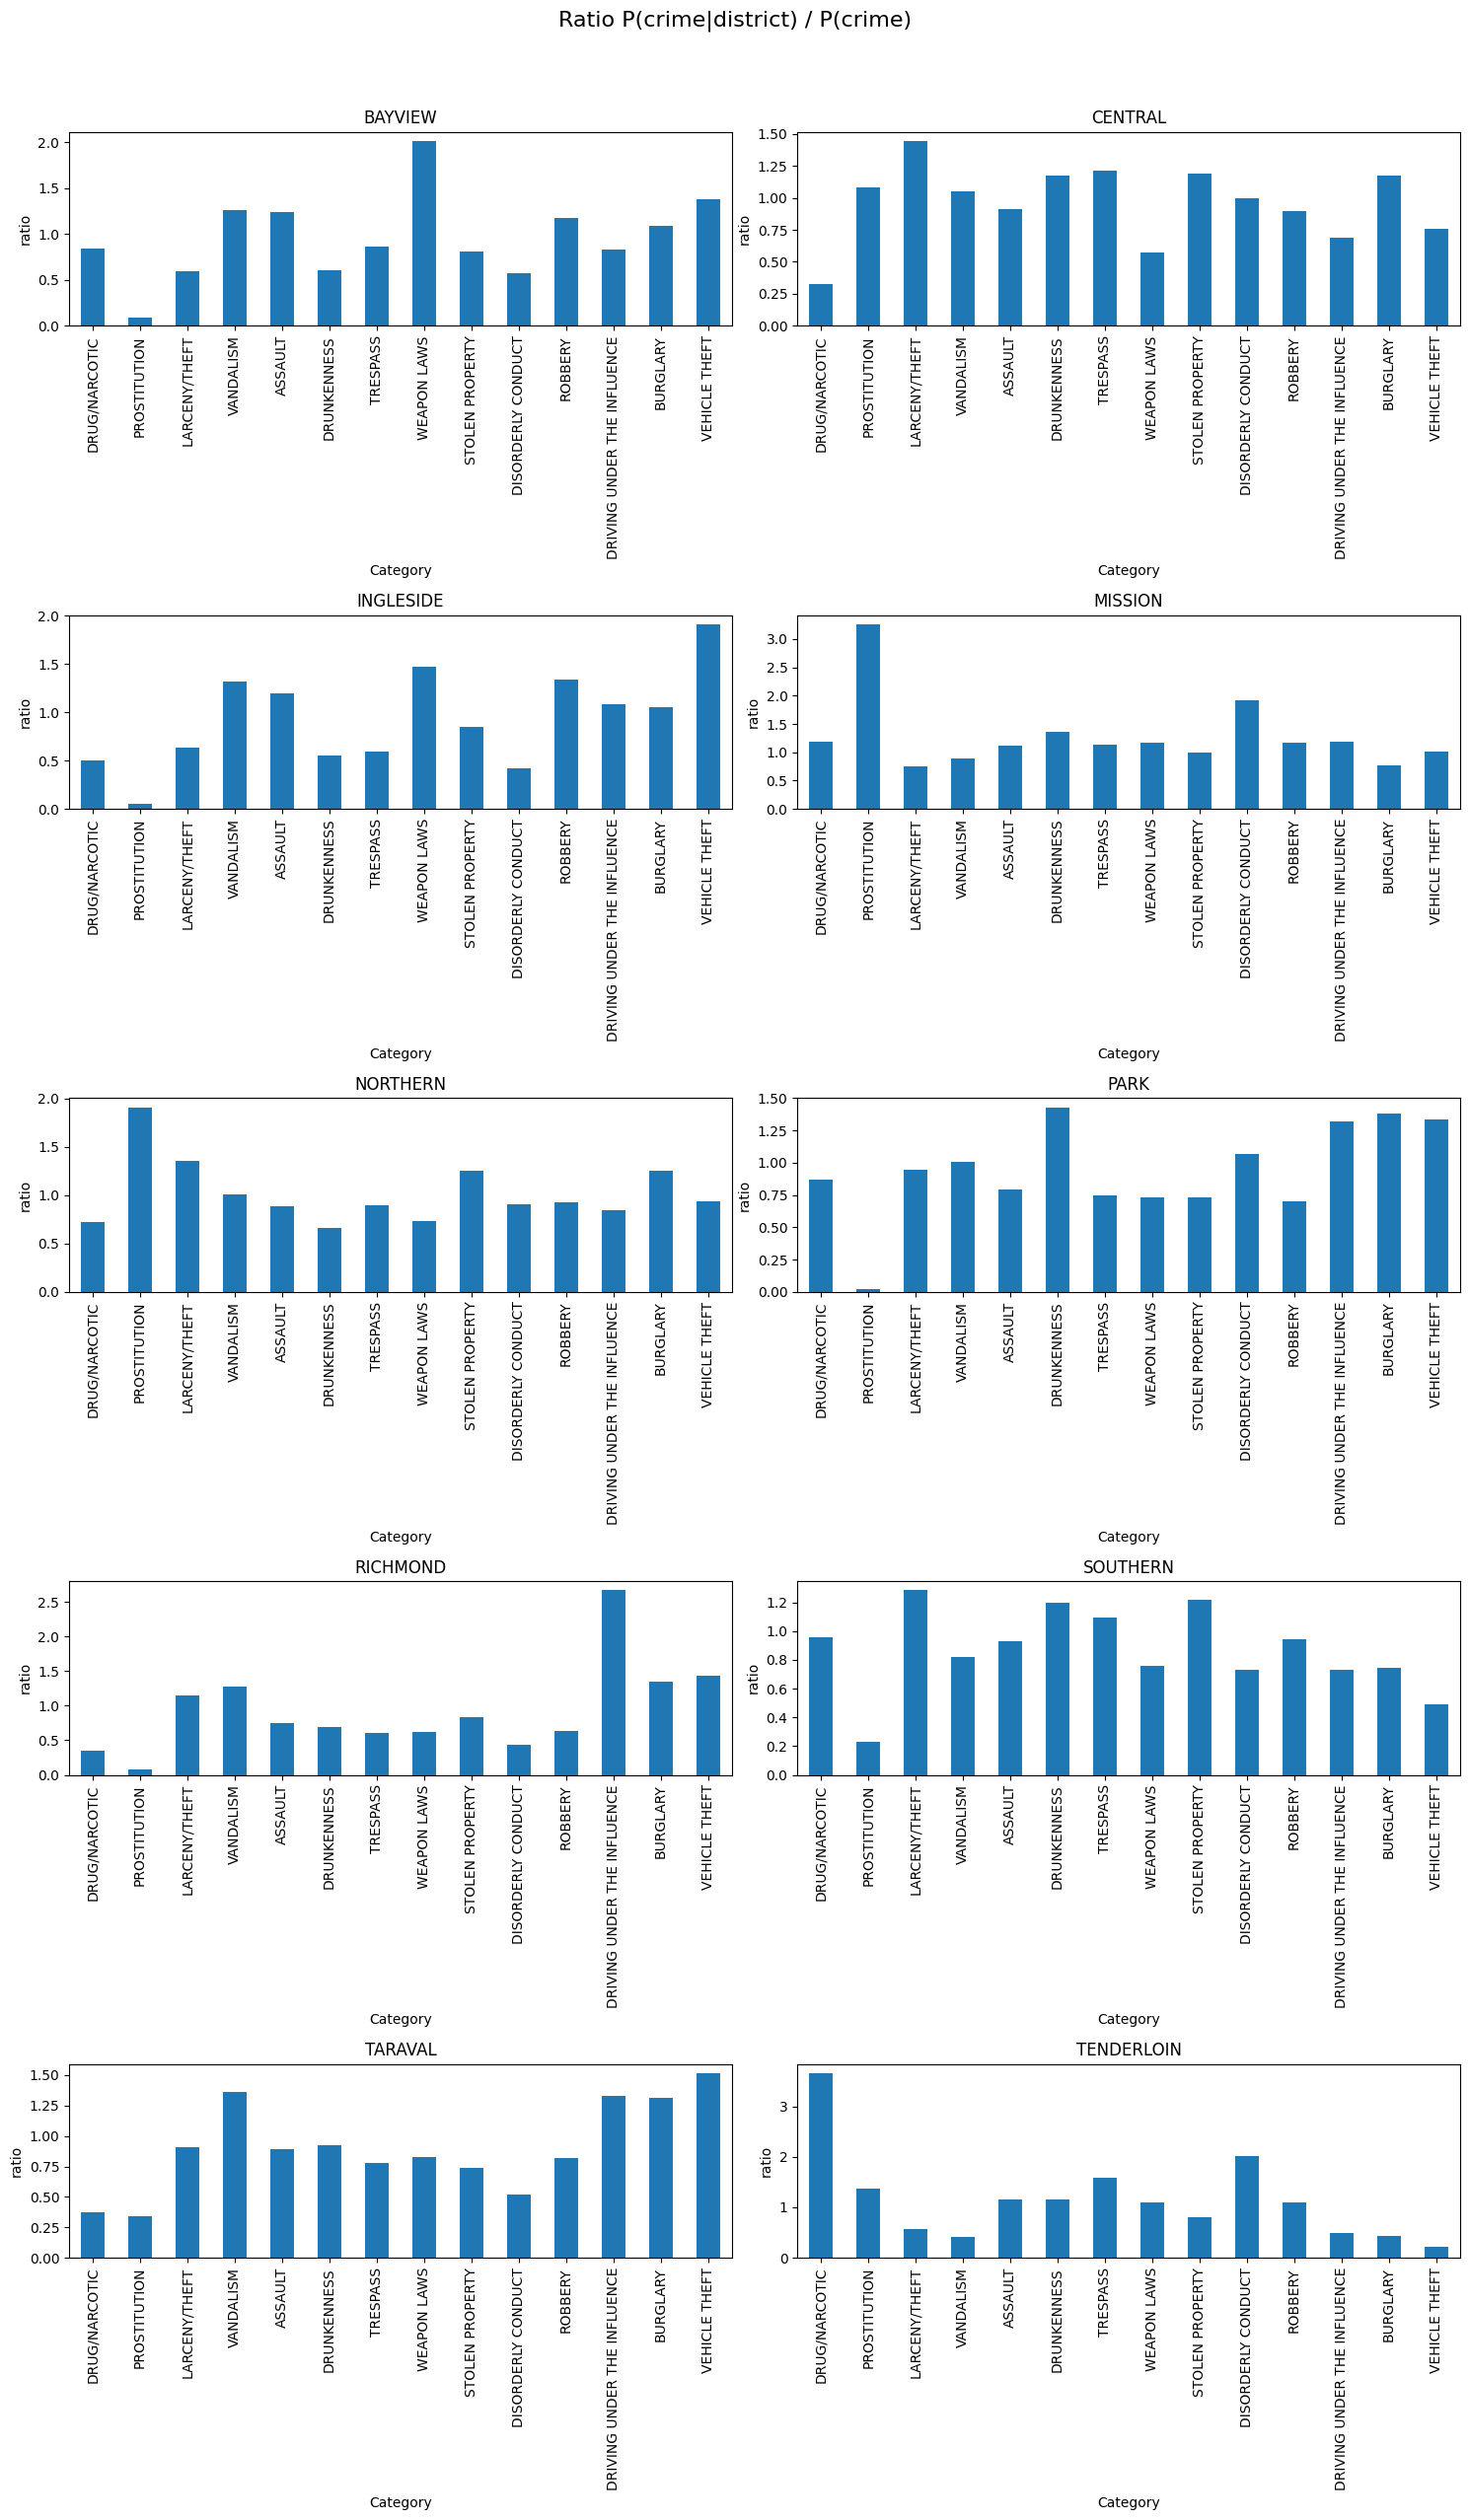

In [69]:
to_districts = sorted(list(to_districts))
num_rows = int(np.ceil(len(to_districts) / 2))
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows)) 
axes = axes.ravel() 
plt.suptitle('Ratio P(crime|district) / P(crime)', fontsize=16, y=1.02)
for idx, district in enumerate(to_districts):
    ax = axes[idx]
    ratios_df.loc[district].plot(kind='bar', ax=ax)
    ax.set_title(district)
    ax.set_ylabel('ratio')
    ax.set_xlabel('Category')

plt.tight_layout()
plt.show()